https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe?select=london_weekdays.csv

Original Datasets has been taken by: https://zenodo.org/record/4446043#.Y9Y7ZtJBwUE

A paper has been written, https://www.sciencedirect.com/science/article/pii/S0261517721000388?via%3Dihub#fig1, which can be cited!

Questions which have to be addressed are:

- Price forecasting - Analyzing previous data about Airbnb listings, such as pricing, room type and amenities, could help predict potential rental prices in the future.

- Business or tourist rental hotspots - By looking at each listing’s location in relation to business and tourism centers and correlating this with pricing can help determine areas where Airbnb rentals will be most profitable.

- Customer sentiment analysis - Analyzing customer comments and satisfaction ratings to measure the effectiveness of a specific listing on their overall customer experience could be an useful tool for hosts to optimize their services further and improve user satisfaction ratings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
#Amsterdam
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekend = pd.read_csv('amsterdam_weekends.csv')

#Athens
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekend = pd.read_csv('athens_weekends.csv')

#Barcelona
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekend = pd.read_csv('barcelona_weekends.csv')

#Berlin
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekend = pd.read_csv('berlin_weekends.csv')

#Budapest
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekend = pd.read_csv('budapest_weekends.csv')

#Lisbon
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekend = pd.read_csv('lisbon_weekends.csv')

#London
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekend = pd.read_csv('london_weekends.csv')

#Paris
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekend = pd.read_csv('paris_weekends.csv')

#Rome
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekend = pd.read_csv('rome_weekends.csv')

#Vienna
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekend = pd.read_csv('vienna_weekends.csv')

Let's see one dataset randomly

In [3]:
budapest_weekend

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0              0  332.048691  Entire home/apt        False         False   
1              1  331.108709  Entire home/apt        False         False   
2              2  243.925365  Entire home/apt        False         False   
3              3  206.561075  Entire home/apt        False         False   
4              4  238.285473  Entire home/apt        False         False   
...          ...         ...              ...          ...           ...   
1943        1943  100.813085  Entire home/apt        False         False   
1944        1944  148.517178  Entire home/apt        False         False   
1945        1945  162.851906  Entire home/apt        False         False   
1946        1946  129.247544  Entire home/apt        False         False   
1947        1947  129.247544  Entire home/apt        False         False   

      person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                 6.0               True      0    1                10.0   
1                 6.0              False      0    1                 9.0   
2                 6.0              False      1    0                10.0   
3                 5.0               True      1    0                10.0   
4                 4.0              False      1    0                 9.0   
...               ...                ...    ...  ...                 ...   
1943              4.0              False      0    0                 9.0   
1944              3.0              False      0    1                 9.0   
1945              4.0              False      0    0                10.0   
1946              3.0              False      0    1                10.0   
1947              3.0              False      0    1                10.0   

      guest_satisfaction_overall  bedrooms       dist  metro_dist  \
0                           99.0         1   0.359372    0.352662   
1                           98.0         2   0.929438    0.200219   
2                           95.0         2   0.674318    0.314709   
3                           99.0         2   1.338114    0.614128   
4                           84.0         0   0.835635    0.175568   
...                          ...       ...        ...         ...   
1943                        93.0         1   1.531943    0.380406   
1944                        93.0         1   1.669953    0.272540   
1945                        93.0         1  11.855169    7.930163   
1946                        90.0         1   1.669951    0.272549   
1947                        93.0         1   1.669965    0.272524   

       attr_index  attr_index_norm  rest_index  rest_index_norm       lng  \
0      404.398511        24.136091  893.418228        78.100790  19.05074   
1     1675.492994       100.000000  452.536452        39.559809  19.04493   
2      430.053337        25.667272  698.767674        61.084838  19.04809   
3      482.626888        28.805067  371.541633        32.479408  19.03685   
4      535.762958        31.976437  534.317055        46.708902  19.04655   
...           ...              ...         ...              ...       ...   
1943   147.980009         8.832028  357.000875        31.208285  19.06987   
1944   141.502551         8.445428  321.138089        28.073233  19.07000   
1945    24.825476         1.481682   40.168851         3.511479  19.09776   
1946   141.502537         8.445427  321.138570        28.073275  19.07000   
1947   141.502052         8.445398  321.135594        28.073015  19.07000   

           lat  
0     47.50076  
1     47.50405  
2     47.50297  
3     47.50104  
4     47.50398  
...        ...  
1943  47.48975  
1944  47.48800  
1945  47.39608  
1946  47.48800  
1947  47.48800  

[1948 rows x 20 columns]

I know that the datasets have all the same columns. What is the meaning?

The meaning of the columns:

- **realSum**: The total price of the Airbnb listing
- **roomtype**: The type of room offered (e.g. private room, shared room, entire home/apt). 
- **room_shared**: Whether the room is shared or not. 
- **room_private**: Whether the room is private or not.
- **person_capacity**: The maximum number of people that can be accommodated in a single listing.
- **host_is_superhost**: Whether or not a particular host is identified as a superhost on Airbnb. 
- **multi**: Whether multiple rooms are provided in one individual listing or not. 
- **biz**: Whether a particular listing offers business facilities like meeting area/conference rooms in addition to 
- **cleanless_rating**: The rating associated with how clean an individual property was after guests stayed at it. 
- **guest_satisfaction_overall**: The rating associated with how clean an individual property was after guests stayed at it.
- **dist**: The total quantity of bedrooms available among all properties against a single hosting id.
- **metro_dist**: Distance from metro station associated with every rental property.
- **attr_index**: attraction index
- **attr_index_norm**: attraction index, normalized
- **rest_index**: restaurant index
- **rest_index_norm**: restaurant index, normalized
- **lng** Longitude measurement corresponding to each rental unit. 
- **lat**: Latitude measurement corresponding to each rental unit.

Before we move on, let's see the realSum, which gives the total price. I do not know if everything has been converted into Euro(€) because London and Budapest are cities, the countries of which are not part of Eurozone (Great Britain is not even part of European Union).

If I convert into € I can use:

- 1 pound = 1.13€
- 1 Hungarian Forint = 0.003€

However, the price of airbnbs in Budapest will become very low...Thus, I assume that everything is in €.


Currency: https://www.xe.com/currencyconverter/convert/?Amount=1&From=HUF&To=EUR

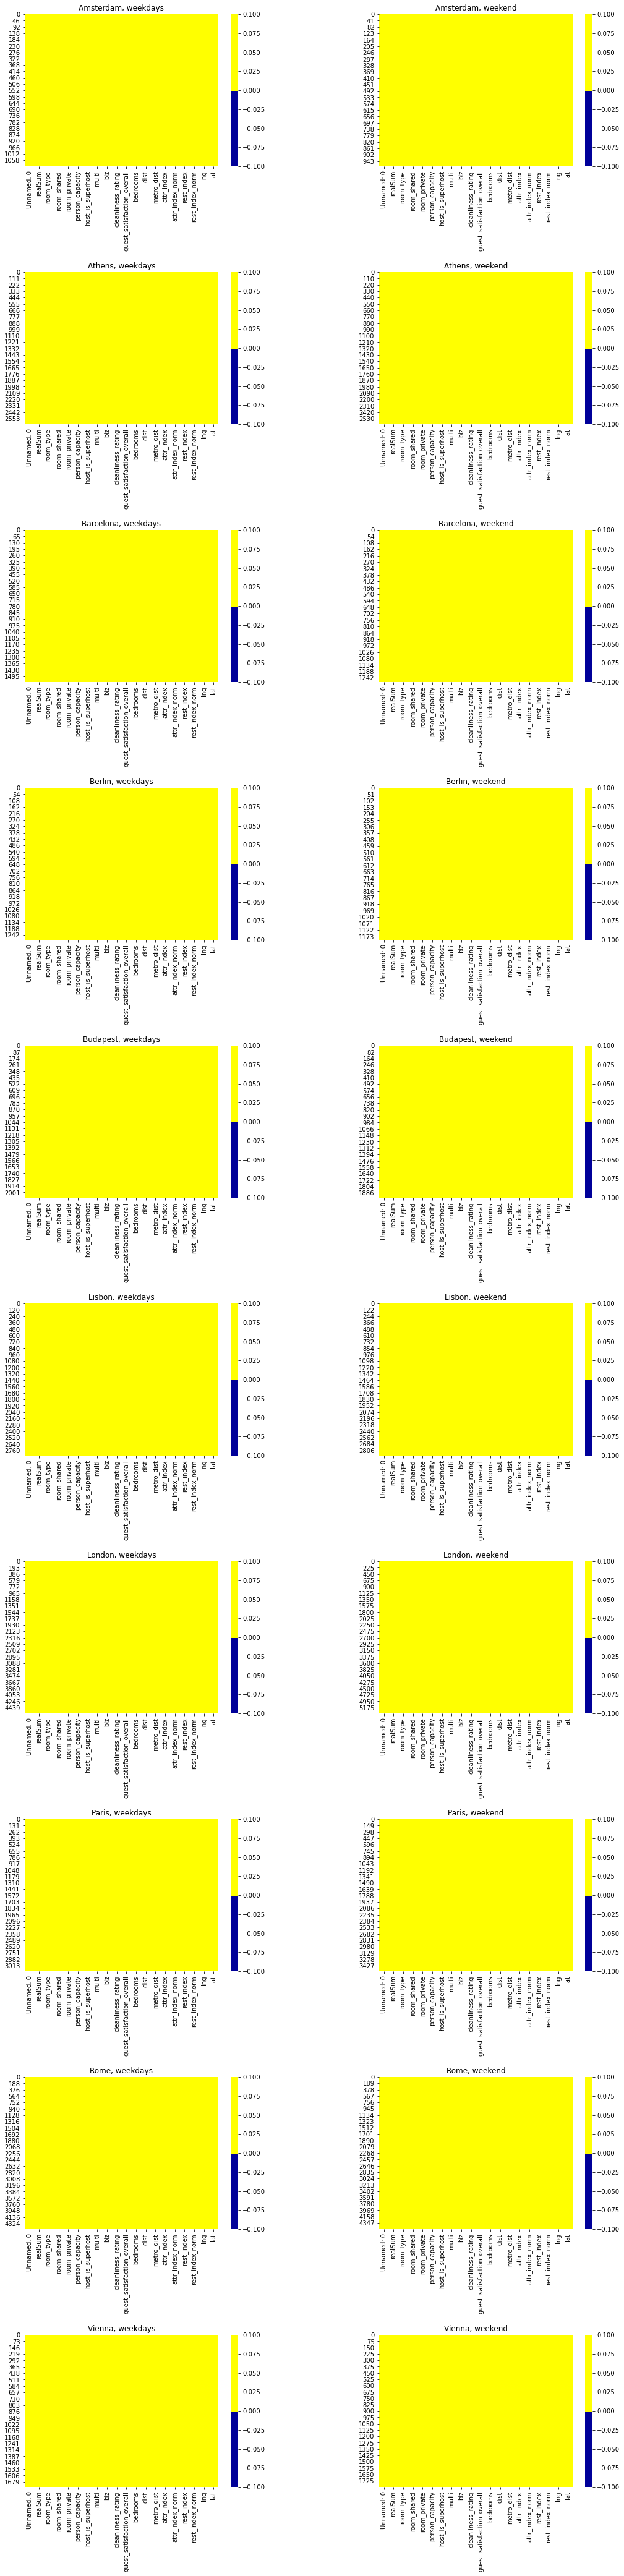

In [4]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.

cities = ['Amsterdam','Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'London', 'Paris', 'Rome', 'Vienna']
weekdays = [amsterdam_weekdays, athens_weekdays, barcelona_weekdays, berlin_weekdays, budapest_weekdays,
            lisbon_weekdays, london_weekdays, paris_weekdays, rome_weekdays, vienna_weekdays]
weekend = [amsterdam_weekend, athens_weekend, barcelona_weekend, berlin_weekend, budapest_weekend,
            lisbon_weekend, london_weekend, paris_weekend, rome_weekend, vienna_weekend]

fig, ax = plt.subplots(10,2,figsize=(18,60))
fig.tight_layout(pad=15.0)

i=0
for x,y in zip(weekdays, weekend):
    cols_x = x.columns
    cols_y = y.columns
    sns.heatmap(x[cols_x].isnull(), ax=ax[i,0], cmap=sns.color_palette(colours))
    ax[i,0].set_title('%s, weekdays'%cities[i])
    sns.heatmap(y[cols_y].isnull(), ax=ax[i,1], cmap=sns.color_palette(colours))
    ax[i,1].set_title('%s, weekend'%cities[i])
    i+=1;

No data are missing...Next step, merge the datasets.

I will create 3 datasets, data_weekends - data_weekdays - all_data:
- **data_weekend**: will include the data of all cities for weekends
- **data_weekdays**: will include the data of all cities for weekdays
- **all_data**: all data together.

I will merge them by appending the one to the other. 

For the datasets **data_weekend** and **data_weekdays** I will create a column with the name City, which will be referring to the city. 

For the dataset **all_data** I will add one more column with the name when_in_week, referring whether it is in weekdays or weekend.

In [5]:
############################################
##############    Weekdays    ##############
############################################
data_weekdays = amsterdam_weekdays.copy()
where = ['Amsterdam' for i in range(amsterdam_weekdays.shape[0])]
data_weekdays['City'] = where

i=1
for x in weekdays[1:]:
    where = [cities[i] for x in range(x.shape[0])]
    x['City'] = where
    data_weekdays = data_weekdays.append(x, ignore_index=True)
    i+=1
    
###########################################
##############    Weekend    ##############
###########################################
data_weekend = amsterdam_weekend.copy()
where = ['Amsterdam' for i in range(amsterdam_weekend.shape[0])]
data_weekend['City'] = where

i=1
for x in weekend[1:]:
    where = [cities[i] for x in range(x.shape[0])]
    x['City'] = where
    data_weekend = data_weekend.append(x, ignore_index=True)
    i+=1
    
###########################################
#############    All data    ##############
###########################################
all_data = data_weekdays.copy()
when_weekdays = ['Weekdays' for i in range(all_data.shape[0])]
all_data['When'] = when_weekdays

data_weekend_copy = data_weekend.copy()
when_weekend = ['Weekend' for i in range(data_weekend_copy.shape[0])]
data_weekend_copy['When'] = when_weekend

all_data = all_data.append(data_weekend_copy, ignore_index=True)

I need to drop off some columns, which meaning I do not know because it is not given or because they are useless. These columns are:
- Unnamed: 0
- attr_index
- rest_index

In [6]:
data_weekdays = data_weekdays.drop(["Unnamed: 0","attr_index","rest_index"],axis=1)
data_weekend = data_weekend.drop(["Unnamed: 0","attr_index","rest_index"],axis=1)
all_data = all_data.drop(["Unnamed: 0","attr_index","rest_index"],axis=1)

### Let's see which dataset is larger and which smaller

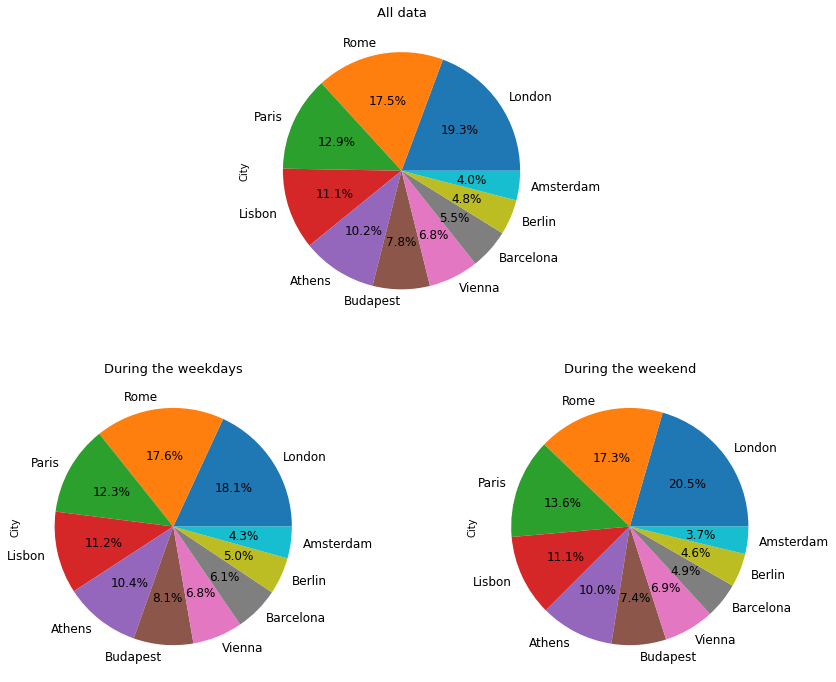

In [7]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])

all_data.City.value_counts().plot(kind='pie', ax=ax0, autopct='%1.1f%%', fontsize=12)
all_data.City[all_data.When=='Weekdays'].value_counts().plot(kind='pie', ax=ax1, autopct='%1.1f%%', fontsize=12)
all_data.City[all_data.When=='Weekend'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', fontsize=12)

ax0.set_title('All data', fontsize=13)
ax1.set_title('During the weekdays', fontsize=13)
ax2.set_title('During the weekend', fontsize=13);

### Let's see the cities on the map

In [8]:
#[Latitude,Longitude]
capitals_lat_lng = {'Amsterdam': [52.377956,4.897070],
                    'Athens': [37.983810,23.727539],
                    'Barcelona': [41.390205, 2.154007],
                    'Berlin': [52.520008, 13.404954],
                    'Budapest': [47.497913, 19.040236],
                    'Lisbon': [38.736946, -9.142685],
                    'London': [51.509865, -0.118092],
                    'Paris': [48.864716, 2.349014],
                    'Rome': [41.902782, 12.496366],
                    'Vienna': [48.210033, 16.363449]}

map = folium.Map(location=capitals_lat_lng['Budapest'],
                   tiles="Stamen Terrain", zoom_start=4.2)#Stamen Terrain
for key,val in capitals_lat_lng.items():
    folium.Marker(location=val).add_to(map)
map

### Boxplots with the total prices per City during weekdays vs weekends

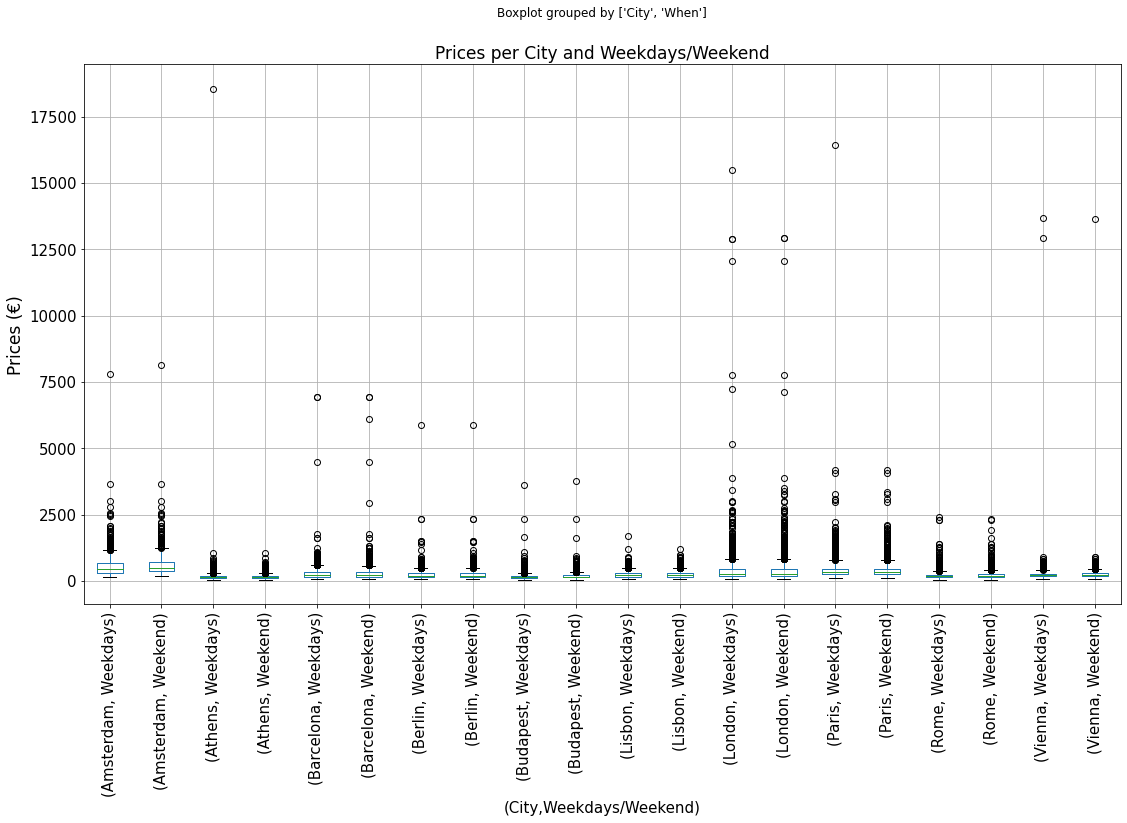

In [9]:
all_data[['realSum','City','When']].boxplot(by=['City','When'],
                                            rot=90,fontsize=15,figsize=(18,10))
plt.xlabel('(City,Weekdays/Weekend)', fontsize=15)
plt.ylabel('Prices (€)', fontsize=17)
plt.title('Prices per City and Weekdays/Weekend', fontsize=17);

Let's zoom a little bit...

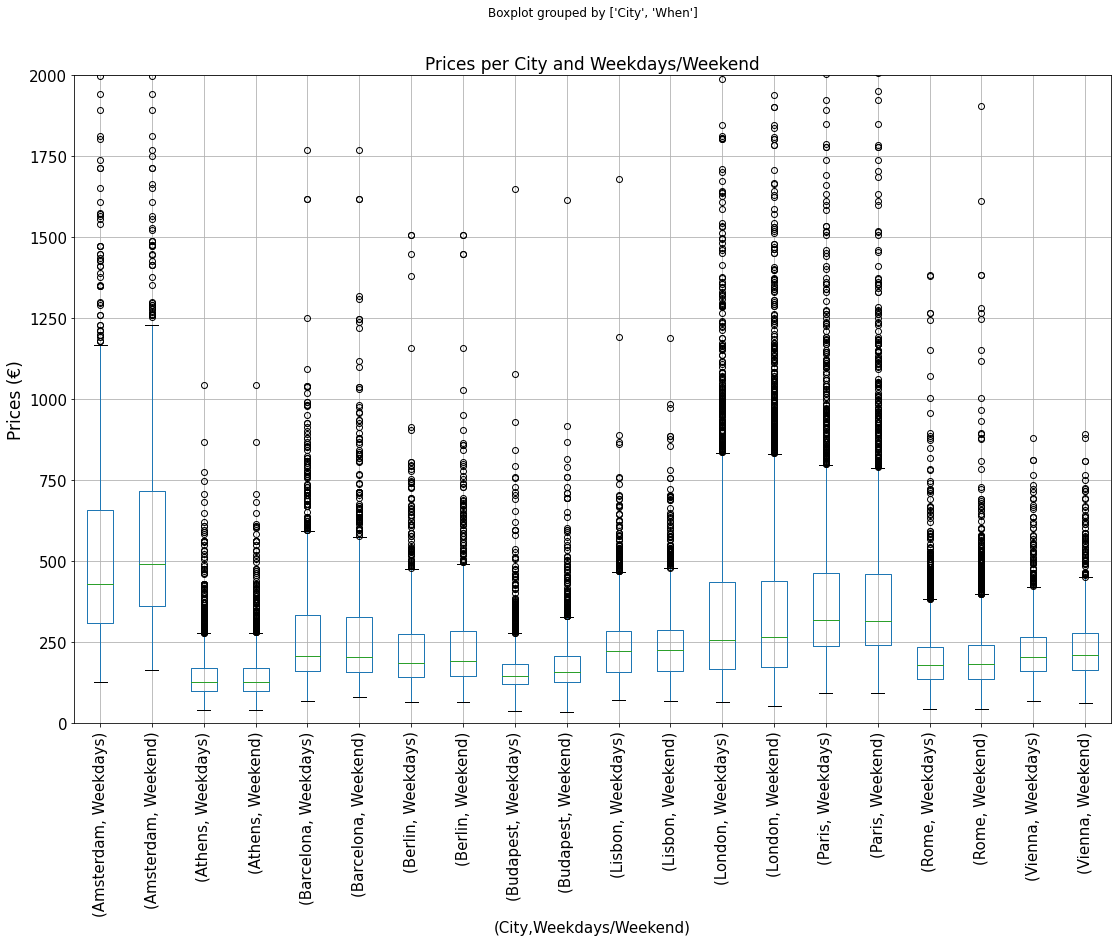

In [10]:
fig, ax = plt.subplots(1,1, figsize=(18,12))

all_data[['realSum','City','When']].boxplot(by=['City','When'],ax=ax,rot=90,fontsize=15)
ax.set_ylim(0,2000)
ax.set_xlabel('(City,Weekdays/Weekend)', fontsize=15)
ax.set_ylabel('Prices (€)', fontsize=17)
ax.set_title('Prices per City and Weekdays/Weekend', fontsize=17);

### Let's make some statistics related to the room type

I calculate the percentage of available room_types for each city

In [11]:
#room_type will include the different types of "hosting" from the room_type column
room_type =data_weekdays[data_weekdays.City=='Amsterdam'].room_type.value_counts().keys()

per_weekdays={}
per_weekend={}

for city in cities:
    
    percentages_city = round((data_weekdays[data_weekdays.City==city].room_type.value_counts()/data_weekdays[data_weekdays.City==city].room_type.value_counts().sum())*100,1)
    new_item = {room_type[0]: percentages_city[room_type[0]],
                room_type[1]: percentages_city[room_type[1]],
                room_type[2]: percentages_city[room_type[2]]}
    per_weekdays[city] = new_item
    
    percentages_city = round((data_weekend[data_weekend.City==city].room_type.value_counts()/data_weekend[data_weekend.City==city].room_type.value_counts().sum())*100,1)
    new_item = {room_type[0]: percentages_city[room_type[0]],
                room_type[1]: percentages_city[room_type[1]],
                room_type[2]: percentages_city[room_type[2]]}
    per_weekend[city] = new_item
    
room_type_percentages_weekdays = pd.DataFrame(per_weekdays)
room_type_percentages_weekend = pd.DataFrame(per_weekend)

In [12]:
room_type_percentages_weekdays

Amsterdam  Athens  Barcelona  Berlin  Budapest  Lisbon  \
Private room          50.7     7.6       76.2    60.4      10.4    31.3   
Entire home/apt       48.8    92.2       23.3    36.9      89.2    67.5   
Shared room            0.5     0.2        0.5     2.7       0.3     1.2   

                 London  Paris  Rome  Vienna  
Private room       56.9   24.2  38.5    22.0  
Entire home/apt    42.6   74.3  61.3    77.6  
Shared room         0.5    1.5   0.2     0.4

In [13]:
room_type_percentages_weekend

Amsterdam  Athens  Barcelona  Berlin  Budapest  Lisbon  \
Private room          39.4     7.5       85.6    62.8      10.4    31.6   
Entire home/apt       60.2    92.3       14.1    34.0      89.2    67.1   
Shared room            0.4     0.2        0.3     3.2       0.4     1.3   

                 London  Paris  Rome  Vienna  
Private room       54.5   21.6  38.0    21.8  
Entire home/apt    45.0   77.1  61.9    77.7  
Shared room         0.5    1.3   0.1     0.5

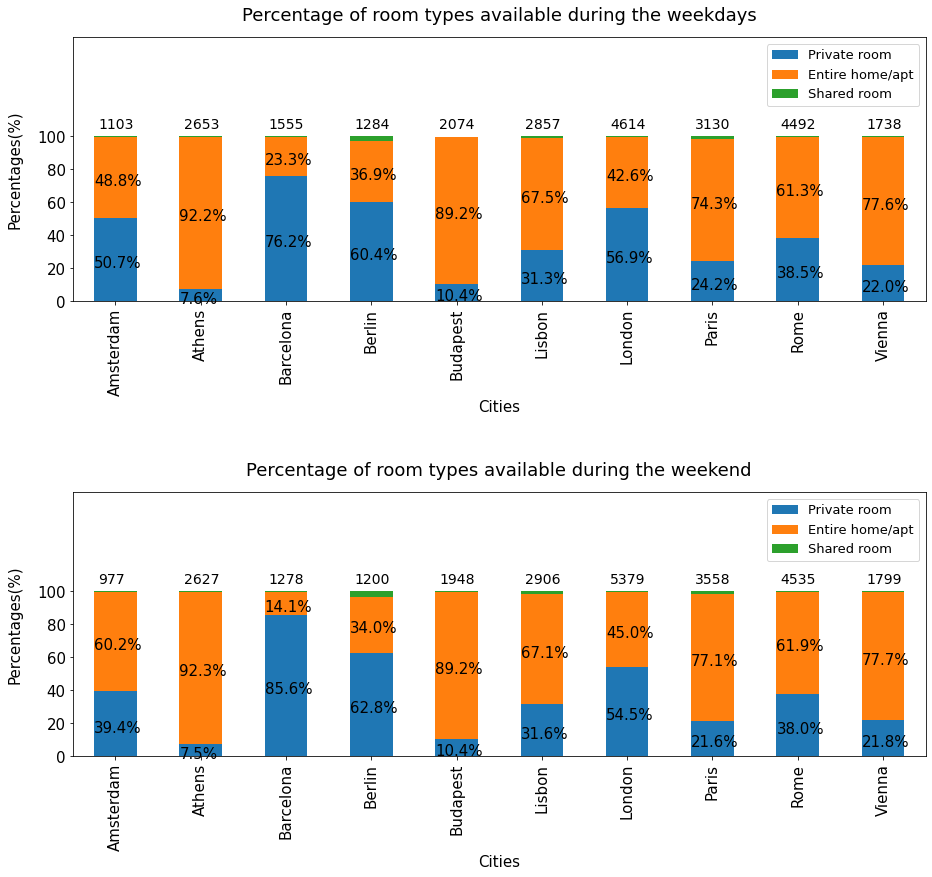

In [14]:
fig, ax = plt.subplots(2,1,figsize=(17,15))
fig.tight_layout(pad=17)

room_type_percentages_weekdays.T.plot(kind='bar', stacked=True, ax=ax[0], fontsize=15)
room_type_percentages_weekend.T.plot(kind='bar', stacked=True, ax=ax[1], fontsize=15)

ax[0].set_title('Percentage of room types available during the weekdays',y=1.04,fontsize=18)
ax[1].set_title('Percentage of room types available during the weekend',y=1.04,fontsize=18)

y_ticks=np.arange(0,120,20)
for i in range(2):
    ax[i].set_yticks(y_ticks)
    ax[i].set_yticklabels(y_ticks)
    ax[i].set_ylim(0,160)
    ax[i].set_ylabel('Percentages(%)',labelpad=15,fontsize=15)
    
    ax[i].legend(fontsize=13)

    ax[i].set_xlabel('Cities',fontsize=15)

    

when=['Weekdays','Weekend']
which_frame=[room_type_percentages_weekdays,room_type_percentages_weekend]
for i in range(len(when)):
    for j in range(len(cities)):
        total_number_of_hostings = all_data[(all_data.When==when[i]) & (all_data.City==cities[j])].shape[0]
        ax[i].text(j-0.2,105,total_number_of_hostings, fontsize=14)
            
        h_private_room = which_frame[i][cities[j]]['Private room']/2
        value = which_frame[i][cities[j]]['Private room']
        ax[i].text(j-0.25,h_private_room-5,'{}%'.format(value),fontsize=15)
            
        h_home = which_frame[i][cities[j]]['Private room'] + which_frame[i][cities[j]]['Entire home/apt']/2
        value = which_frame[i][cities[j]]['Entire home/apt']
        ax[i].text(j-0.25,h_home-5,'{}%'.format(value),fontsize=15)

One can understand that there are cities the Shared room option shares a small percent of the market!! On the other hand, the other two options are dominant options of the market.

Thus, when the time for the prediction of the price will come, I will split the datasets into the three options; the room_type options.

### Are two specific columns useful at all?

Let's understand the meaning of two columns:

- room_shared
- room_private

The reason that I select those two columns is because they must have a similarity with room_type.

In [15]:
for x in room_type:
    print(x,' and room_private: ',all_data[(all_data.room_type==x)].room_private.value_counts())
    print(x,' and room_shared: ',all_data[(all_data.room_type==x)].room_shared.value_counts())
    print()

Private room  and room_private:  True    18693
Name: room_private, dtype: int64
Private room  and room_shared:  False    18693
Name: room_shared, dtype: int64

Entire home/apt  and room_private:  False    32648
Name: room_private, dtype: int64
Entire home/apt  and room_shared:  False    32648
Name: room_shared, dtype: int64

Shared room  and room_private:  False    366
Name: room_private, dtype: int64
Shared room  and room_shared:  True    366
Name: room_shared, dtype: int64



So, from all datasets together one can understand that the columns room_private and room_shared are useless, because the information is included in the room_type. The answer is above!

I drop the columns room_shared and room_private from the datasets.

In [16]:
data_weekdays = data_weekdays.drop(["room_shared","room_private"],axis=1)
data_weekend = data_weekend.drop(["room_shared","room_private"],axis=1)
all_data = all_data.drop(["room_shared","room_private"],axis=1)

In [17]:
data_weekdays

realSum        room_type  person_capacity  host_is_superhost  multi  \
0      194.033698     Private room              2.0              False      1   
1      344.245776     Private room              4.0              False      0   
2      264.101422     Private room              2.0              False      0   
3      433.529398     Private room              4.0              False      0   
4      485.552926     Private room              2.0               True      0   
...           ...              ...              ...                ...    ...   
25495  219.012224  Entire home/apt              4.0              False      0   
25496  191.197438  Entire home/apt              4.0              False      0   
25497  251.501765  Entire home/apt              2.0              False      0   
25498  637.636444  Entire home/apt              2.0              False      0   
25499  133.230489     Private room              4.0               True      1   

       biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  \
0        0                10.0                        93.0         1   
1        0                 8.0                        85.0         1   
2        1                 9.0                        87.0         1   
3        1                 9.0                        90.0         2   
4        0                10.0                        98.0         1   
...    ...                 ...                         ...       ...   
25495    0                 8.0                        80.0         0   
25496    1                10.0                       100.0         2   
25497    0                 8.0                        86.0         1   
25498    0                10.0                        93.0         1   
25499    0                10.0                        93.0         1   

           dist  metro_dist  attr_index_norm  rest_index_norm       lng  \
0      5.022964    2.539380         4.166708         6.846473   4.90569   
1      0.488389    0.239404        33.421209        58.342928   4.90005   
2      5.748312    3.651621         3.985908         6.646700   4.97512   
3      0.384862    0.439876        26.119108        60.973565   4.89417   
4      0.544738    0.318693        29.272733        56.811677   4.90051   
...         ...         ...              ...              ...       ...   
25495  0.298179    0.257904        60.958556        14.180090  16.37766   
25496  1.052982    0.332054        14.011946         7.309930  16.37892   
25497  0.810224    0.100844        14.678876         8.179995  16.38070   
25498  0.994039    0.202537        12.108419         6.748565  16.38568   
25499  1.263948    0.480922        10.774584         5.384646  16.39066   

            lat       City  
0      52.41772  Amsterdam  
1      52.37432  Amsterdam  
2      52.36103  Amsterdam  
3      52.37663  Amsterdam  
4      52.37508  Amsterdam  
...         ...        ...  
25495  48.20875     Vienna  
25496  48.19973     Vienna  
25497  48.20296     Vienna  
25498  48.20460     Vienna  
25499  48.20811     Vienna  

[25500 rows x 16 columns]

### Price per person capacity for each city during weekdays or weekends

Let's see the price for each city by the number of people that can be hosted.
I take into considderation the private room and entire home/apt, because the Shared_room percentage is very small!

In [18]:
average_price_weekdays, average_price_weekend = [], []
for x in cities:
    price = data_weekdays[(data_weekdays.City==x) & (data_weekdays.room_type!='Shared_room')]['realSum']
    num_of_people = data_weekdays[(data_weekdays.City==x) & (data_weekdays.room_type!='Shared_room')]['person_capacity']
    average_price_weekdays.append(round((price/num_of_people).mean(),1))
    
    price = data_weekend[(data_weekend.City==x) & (data_weekend.room_type!='Shared_room')]['realSum']
    num_of_people = data_weekend[(data_weekend.City==x) & (data_weekend.room_type!='Shared_room')]['person_capacity']
    average_price_weekend.append(round((price/num_of_people).mean(),1))
    
average_price = {'Weekdays': average_price_weekdays,
                 'Weekend': average_price_weekend,
                 'City': cities}
average_price = pd.DataFrame(data=average_price)
average_price

Weekdays  Weekend       City
0     194.6    218.4  Amsterdam
1      46.5     42.7     Athens
2     104.6    121.3  Barcelona
3      90.2     94.6     Berlin
4      50.7     56.7   Budapest
5      74.2     76.4     Lisbon
6     126.5    126.8     London
7     140.4    135.0      Paris
8      64.2     66.5       Rome
9      79.0     78.6     Vienna

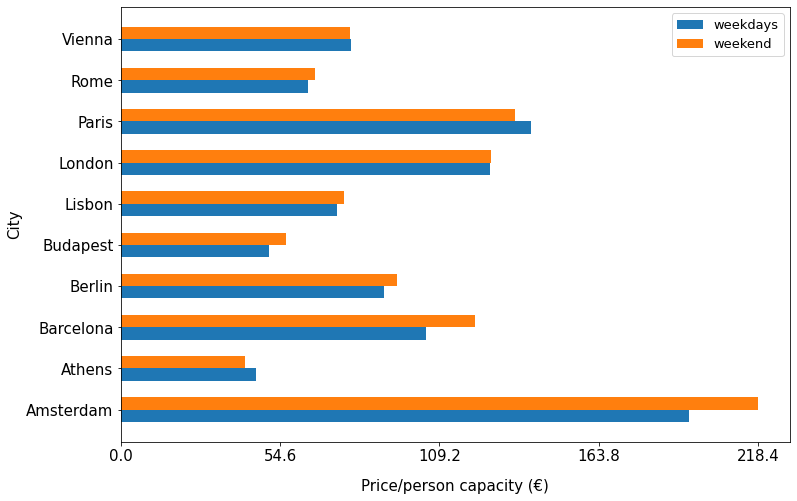

In [19]:
fig, ax = plt.subplots(1,1, figsize=(12,8))

x = np.arange(10)
width = 0.3
ax.barh(x-width/2,average_price_weekdays,width,label='weekdays')
ax.barh(x+width/2,average_price_weekend,width,label='weekend')
ax.legend(fontsize=13)

ax.set_yticks(x)
ax.set_yticklabels(cities,fontsize=15)
ax.set_ylabel('City', fontsize=15)

xticks = np.around(np.linspace(0,max(average_price_weekend),5),1)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize=15)
ax.set_xlabel('Price/person capacity (€)',fontsize=15,labelpad=15)

plt.show();

### An interesting question crosses the mind

Are there options in the dataset, which can be found in weekdays and weekend datasets? For example, are there rows with similarities, such as longitude-latitude-distance from the city center-distance from metro-number of bedrooms-persons capacity-room type-multi-biz? Why those?, because the other columns can change, but those can give a similarity. This calculation would be very heavy and time costly, thus I avoid it.

### Map visualization of airbnbs for specific city

I visualize the airbnbs for each city. The basic location shows the city center given by google. The different colors are related to the percentiles of the boxplots:
- 25% of total price -> green
- 50% of total price -> blue
- 75% of total price -> grey
- rest -> red

In [20]:
#########################################################################################################
#########################################################################################################
#########################################################################################################
def price_limits(data,region,variable):
    df=data[data.City==region].describe()
    up_to_25 = df[variable]['25%']
    up_to_50 = df[variable]['50%']
    up_to_75 = df[variable]['75%']

    Q_25 = up_to_25
    Q_50 = up_to_50
    Q_75 = up_to_75
    
    return Q_25, Q_50, Q_75

#########################################################################################################
#########################################################################################################
#########################################################################################################

which_city = 'Barcelona'

price_area_1, price_area_2, price_area_3 = price_limits(data_weekdays,which_city,'realSum')


map = folium.Map(location=capitals_lat_lng[which_city],
                 tiles="cartodbpositron",zoom_start=12.3)#Stamen Terrain 
folium.Marker(location=capitals_lat_lng[which_city]).add_to(map)


specific_city_dataframe = data_weekdays[(data_weekdays.City==which_city)]
specific_city_dataframe = specific_city_dataframe.reset_index()

for i in range(len(specific_city_dataframe['lat'])):
    if specific_city_dataframe['realSum'][i]<=price_area_1:
        color='green'
    if specific_city_dataframe['realSum'][i]>price_area_1 and specific_city_dataframe['realSum'][i]<=price_area_2:
        color='blue'
    if specific_city_dataframe['realSum'][i]>price_area_2 and specific_city_dataframe['realSum'][i]<=price_area_3:
        color='grey'
    if specific_city_dataframe['realSum'][i]>price_area_3:
        color='red'
    latitude = specific_city_dataframe['lat'][i]
    longitude = specific_city_dataframe['lng'][i]
    folium.CircleMarker(location=[latitude,longitude],radius=6,
                  fill_color=color,fill=True,color=True).add_to(map)

map

Let's see now for the different room_types:

- Entire home/apt
- Private room
- Shared room

In [21]:
which_city = 'Rome'


map = folium.Map(location=capitals_lat_lng[which_city],
                 tiles="cartodbpositron",zoom_start=12.3) 
folium.Marker(location=capitals_lat_lng[which_city]).add_to(map)


specific_city_dataframe = data_weekdays[(data_weekdays.City==which_city)]
specific_city_dataframe = specific_city_dataframe.reset_index()

for i in range(len(specific_city_dataframe['lat'])):
    if specific_city_dataframe.room_type[i]=="Entire home/apt":
        color='orange'
    if specific_city_dataframe.room_type[i]=="Private room":
        color='black'
    if specific_city_dataframe.room_type[i]=="Shared room":
        color='violet'
    latitude = specific_city_dataframe['lat'][i]
    longitude = specific_city_dataframe['lng'][i]
    folium.CircleMarker(location=[latitude,longitude],radius=6,
                  fill_color=color,fill=True,color=True).add_to(map)

map

In [22]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data_weekdays["room_type"] = le.fit_transform(data_weekdays["room_type"])
data_weekdays["host_is_superhost"] = le.fit_transform(data_weekdays["host_is_superhost"])

data_weekend["room_type"] = le.fit_transform(data_weekend["room_type"])
data_weekend["host_is_superhost"] = le.fit_transform(data_weekend["host_is_superhost"])

all_data["room_type"] = le.fit_transform(all_data["room_type"])
all_data["host_is_superhost"] = le.fit_transform(all_data["host_is_superhost"])

<AxesSubplot:>

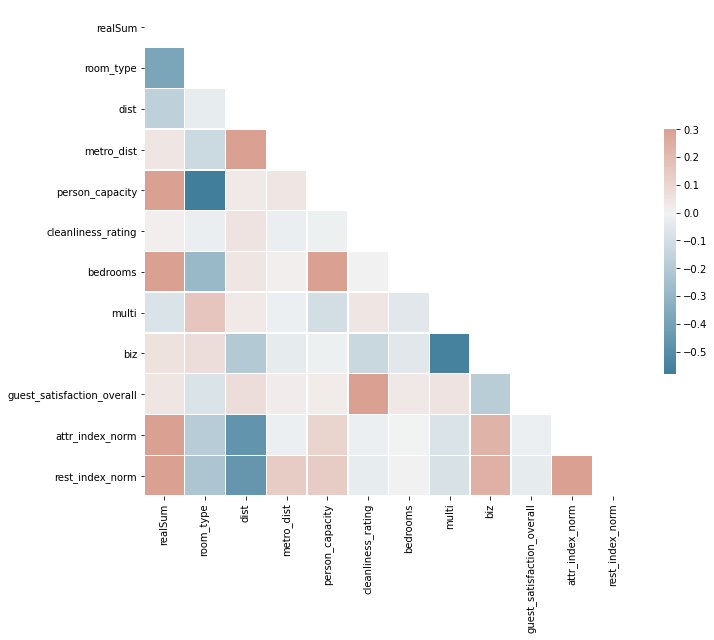

In [23]:
specify_columns=["realSum","room_type","dist","metro_dist","person_capacity","cleanliness_rating","bedrooms","multi","biz","guest_satisfaction_overall","attr_index_norm","rest_index_norm"]
corr=data_weekdays[data_weekdays.City=='Rome'][specify_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

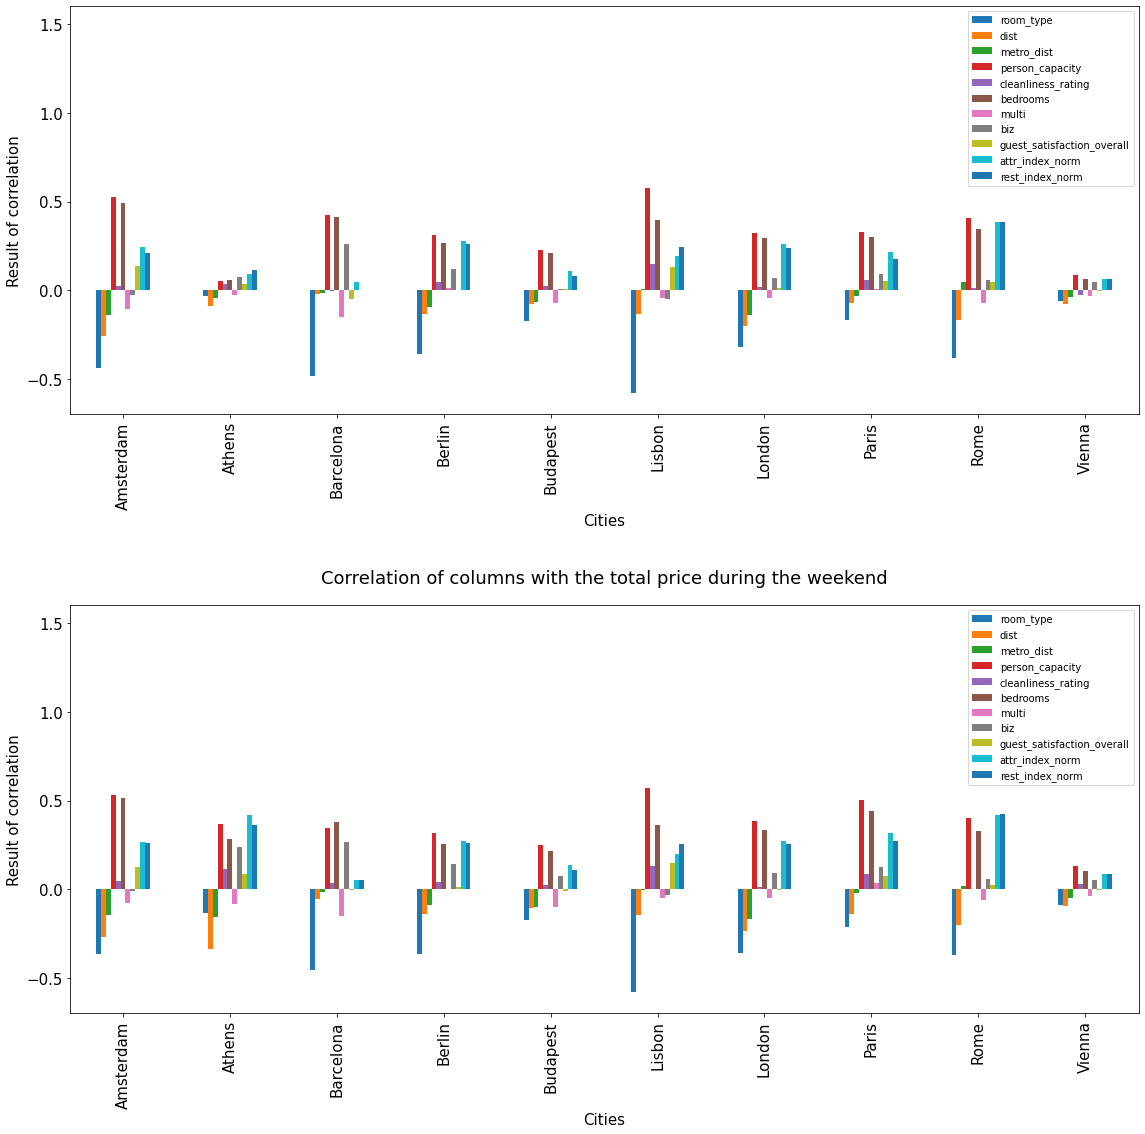

In [24]:
weekdays_corr, weekend_corr = {}, {}

for city in cities:
    
    corr = data_weekdays[data_weekdays.City==city][specify_columns].corr()
    weekdays_corr[city] = corr.realSum[1:]
    
    corr = data_weekend[data_weekend.City==city][specify_columns].corr()
    weekend_corr[city] = corr.realSum[1:]

weekdays_corr = pd.DataFrame(weekdays_corr)
weekend_corr = pd.DataFrame(weekend_corr)

##########################################################################################################


fig, ax = plt.subplots(2,1,figsize=(20,19))
fig.tight_layout(pad=17)

weekdays_corr.T.plot.bar(ax=ax[0],fontsize=15)
weekend_corr.T.plot.bar(ax=ax[1],fontsize=15)

for i in range(2):
    ax[i].set_ylim(-0.7, 1.6)
    ax[i].set_ylabel('Result of correlation', fontsize=15)
    ax[i].set_xlabel('Cities', fontsize=15)

ax[i].set_title('Correlation of columns with the total price during the weekdays',y=1.04,fontsize=18)
ax[1].set_title('Correlation of columns with the total price during the weekend',y=1.04,fontsize=18);

Above one can see that there variables which play an important role for the price are:
- room_type
- dist
- metro_dist
- person_capacity
- bedrooms
- attr_index_norm
- rest_index_norm

### Two methods to be checked for dropping rows from the dataset

I will apply two methods to drop rows from the dataset:

- Method 1: Using the LocalOutlierFactor from the neighbors class of scikit-learn
- Method 2: Using the Boxplot...dropping of outliers, so points which are outside the boxplot

In [25]:
################################################################################################
####################################       Method 1     ########################################
################################################################################################

from sklearn.neighbors import LocalOutlierFactor

def detect_outliers_method_1(df,where,column_names):
    
    d1 = df[df.City==where][column_names].reset_index()
    d1 = d1.drop("index",axis=1)
    
    d1 = d1.values
    lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
    good = lof.fit_predict(d1) == 1
    
    dropped_points = []
    for i in range(len(good)):
        if good[i]==False:
            dropped_points.append(i)
    
    d1 = pd.DataFrame(d1,columns=specify_columns)
    d1 = d1.drop(dropped_points)
    
    return d1

################################################################################################
####################################       Method 2     ########################################
################################################################################################

def detect_outliers_method_2(df,where,column_names):
    
    d2 = df[df.City==where][column_names].reset_index()
    d2 = d2.drop("index",axis=1)
    
    point_25 = np.percentile(d2.realSum,25)
    point_75 = np.percentile(d2.realSum,75)
    IQR = point_75 - point_25
    maximum = point_75 + 1.5*IQR
    dropped_points = [i for i in range(len(d2.iloc[:,0])) if d2.iloc[i,0]>maximum]
    d2 = pd.DataFrame(d2,columns=column_names)
    d2 = d2.drop(dropped_points)
    
    return d2

Let's see the result for two random cities...

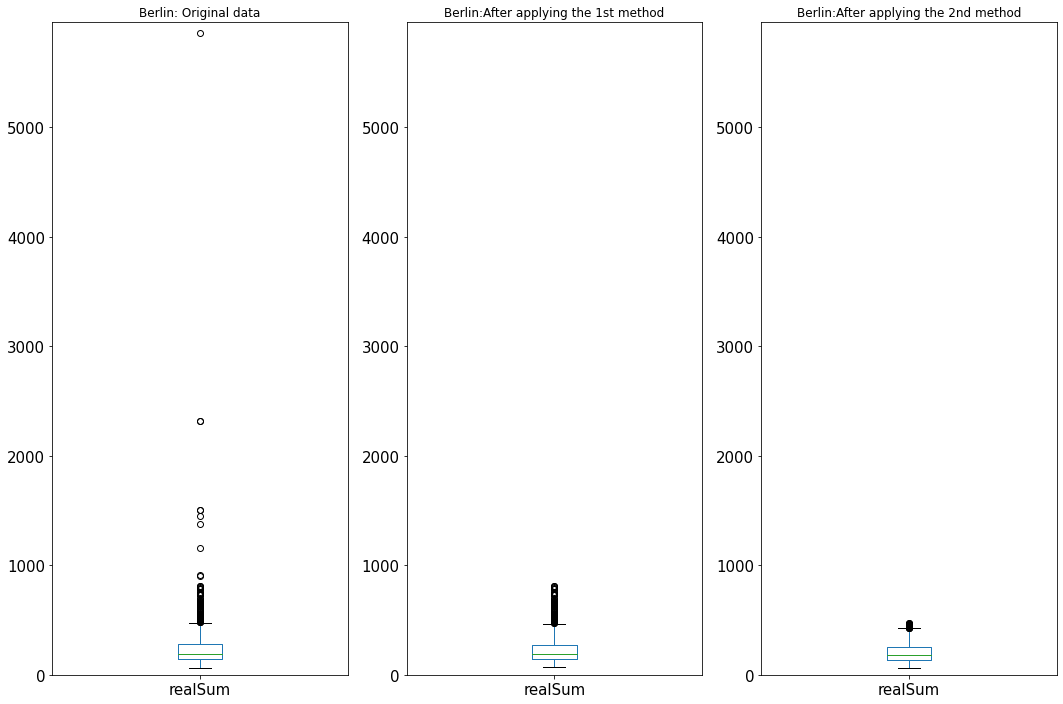

In [26]:
################################################################################################
######################################     Boxplots     ########################################
################################################################################################

city = "Berlin"

specify_columns=["realSum","room_type","dist","metro_dist","person_capacity","cleanliness_rating","bedrooms","multi","biz","guest_satisfaction_overall","attr_index_norm","rest_index_norm"]

fig, ax = plt.subplots(1,3,figsize=(18,12))

upper_limit = data_weekdays[data_weekdays.City==city].realSum.max()
limits = (0,upper_limit + 100)
data_weekdays[data_weekdays.City==city].realSum.plot(kind="box", ax=ax[0], ylim=limits, title=city + ": Original data", fontsize=15)
detect_outliers_method_1(data_weekdays,city,specify_columns).realSum.plot(kind="box", ax=ax[1], ylim=limits, 
                                                                          title=city + ":After applying the 1st method",fontsize=15)
detect_outliers_method_2(data_weekdays,city,specify_columns).realSum.plot(kind="box", ax=ax[2], ylim=limits,
                                                                          title=city + ":After applying the 2nd method",fontsize=15);

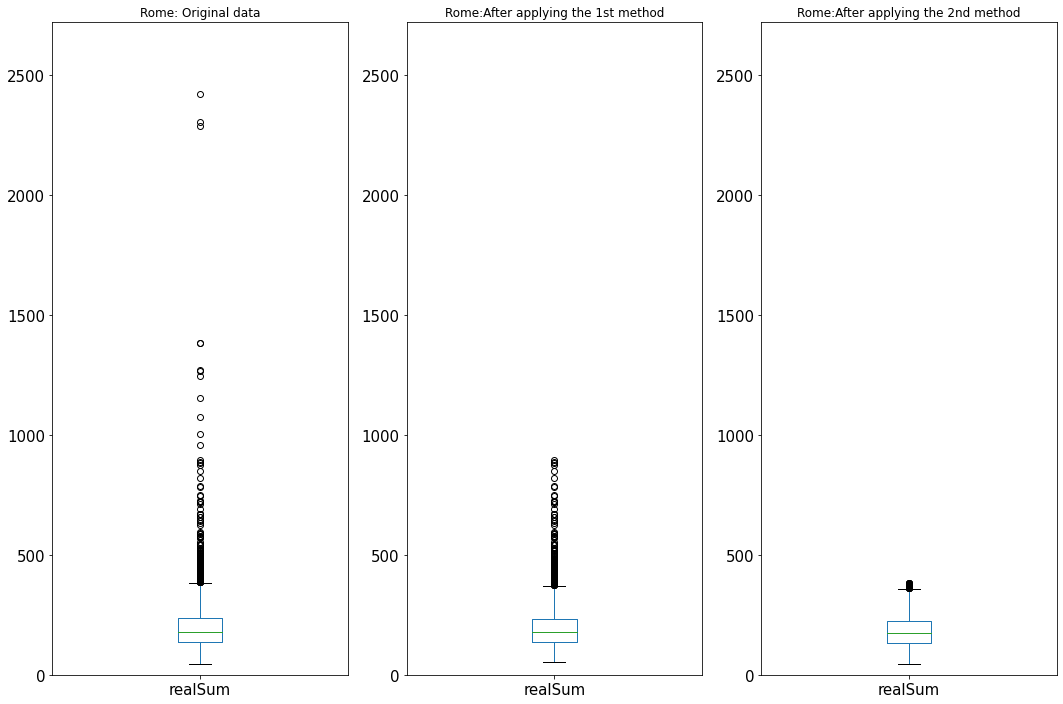

In [27]:
city = "Rome"

fig, ax = plt.subplots(1,3,figsize=(18,12))

limits = (0,data_weekdays[data_weekdays.City==city].realSum.max()+300)
data_weekdays[data_weekdays.City==city].realSum.plot(kind="box", ax=ax[0], ylim=limits, title=city + ": Original data", fontsize=15)
detect_outliers_method_1(data_weekdays,city,specify_columns).realSum.plot(kind="box", ax=ax[1], ylim=limits, 
                                                                          title=city + ":After applying the 1st method",fontsize=15)
detect_outliers_method_2(data_weekdays,city,specify_columns).realSum.plot(kind="box", ax=ax[2], ylim=limits,
                                                                          title=city + ":After applying the 2nd method",fontsize=15);

For both cities, one can see that after applying the methods there are outliers in the boxplots (even after the 2nd method). This is absolutely normal, because the function returns for both methodsa new dataset and of course, there will be identified outliers.

### Predicting the total price

I will try to predict the total price by using the three methods above. I will do it for each city for the weekdays. 

- I specify the columns that I will use for the prediction.
- I preprocess some columns using the QuantileTransformer in order to correct the skewness of some columns. 
- I apply min-max scaling on the independent variables
- I apply linear regression
- I see the plots (for each city and each method including the R-squared)

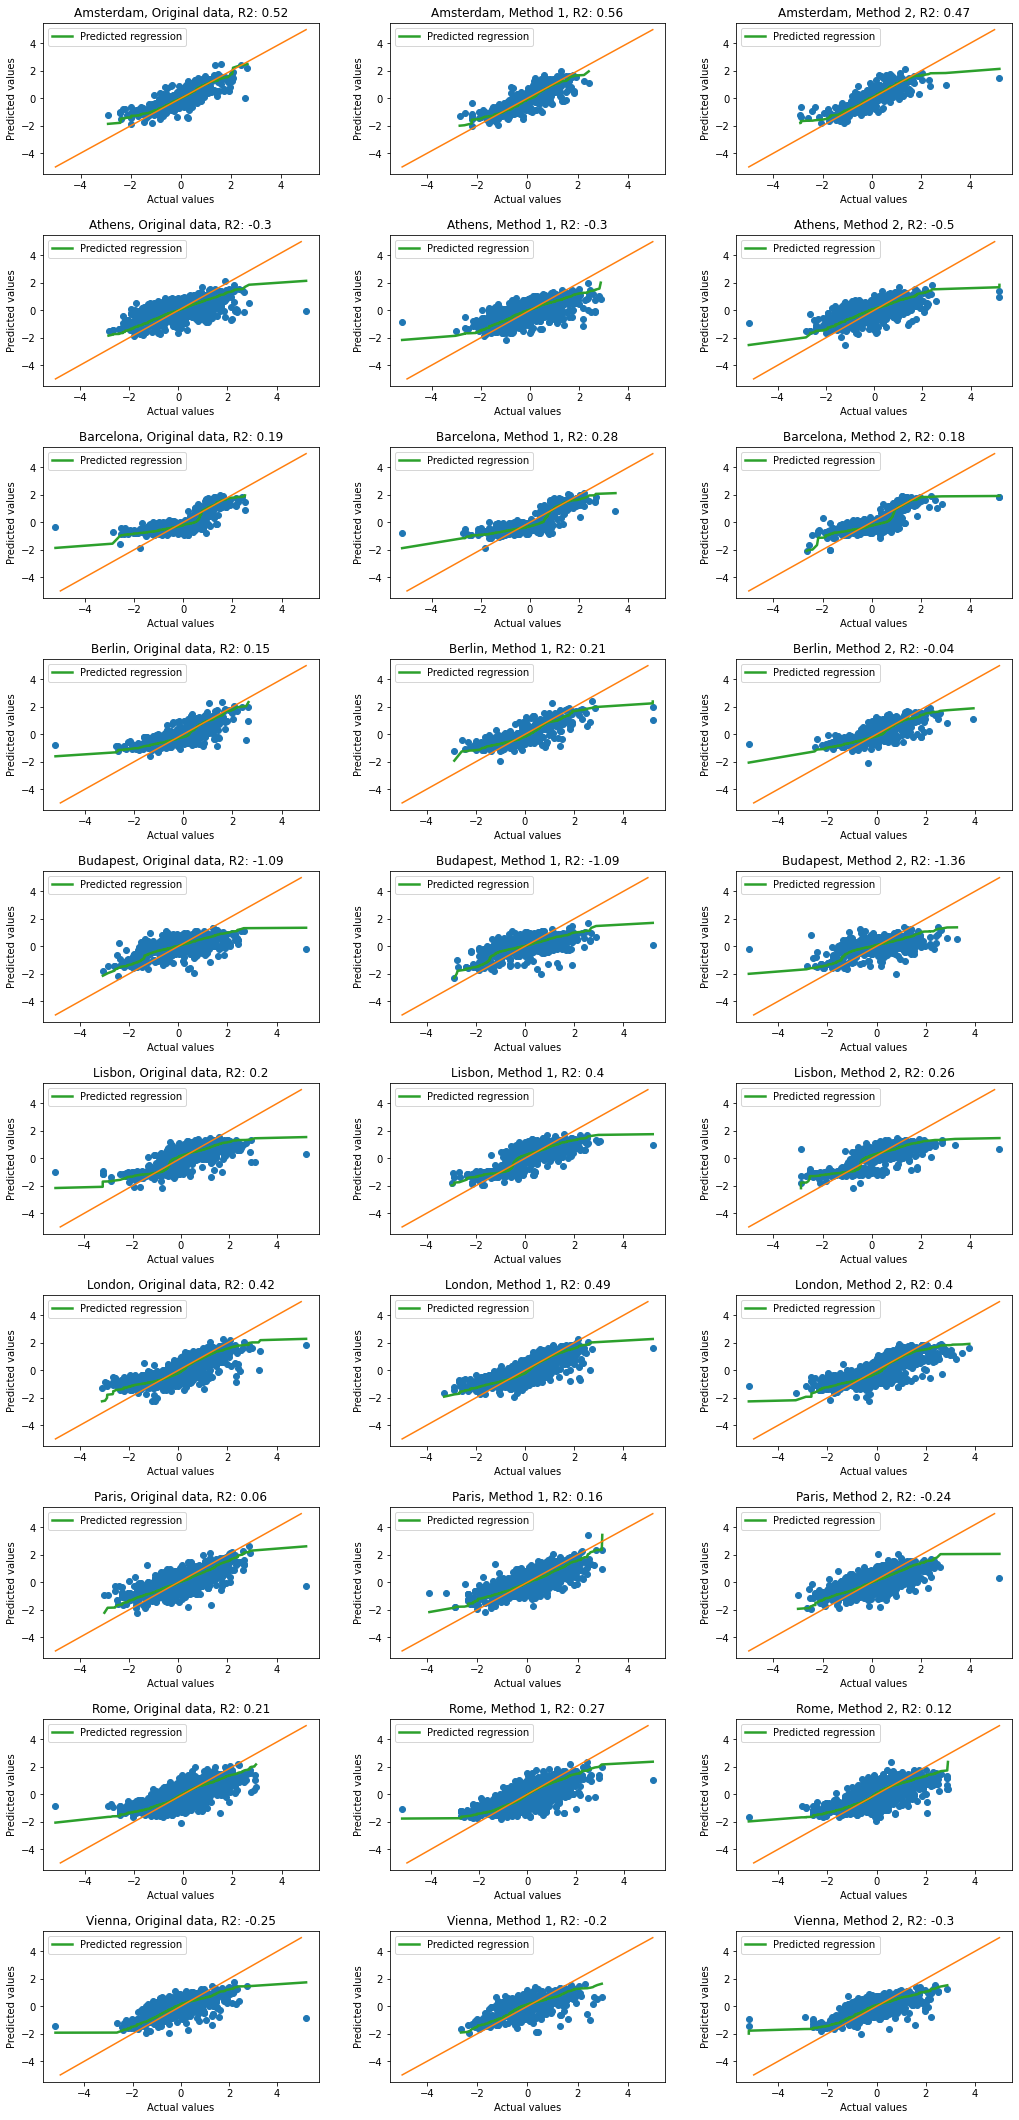

In [96]:
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score

mm = MinMaxScaler()
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

specify_columns=["realSum","room_type","dist","metro_dist","person_capacity","bedrooms","multi","biz","attr_index_norm","rest_index_norm"]
numerical_columns = ["dist","metro_dist","attr_index_norm","rest_index_norm"]

prediction = []
trained_model = []
fitted_prices = []

fig, ax = plt.subplots(10,3,figsize=(15,30))
fig.tight_layout(pad=4)

methods = ["Original data","Method 1","Method 2"]
for i,method in enumerate(methods):
    model_per_method = []
    for j in range(len(cities)):
        if method=="Original data":
            detection = data_weekdays[data_weekdays.City==cities[j]][specify_columns]
            X, y = detection[specify_columns[1:]], detection.realSum
        elif method=="Method 1":
            detection = detect_outliers_method_1(data_weekdays,cities[j],specify_columns)
            X, y = detection[specify_columns[1:]], detection.realSum
        else:
            detection = detect_outliers_method_2(data_weekdays,cities[j],specify_columns)
            X, y = detection[specify_columns[1:]], detection.realSum
        
        fitted_prices.append(y)
            
        X_dist_f = qt.fit_transform(X.values.T[1].reshape(-1,1)).reshape(1,-1)[0]
        X_metro_f = qt.fit_transform(X.values.T[2].reshape(-1,1)).reshape(1,-1)[0]
        X_attr_f = qt.fit_transform(X.values.T[7].reshape(-1,1)).reshape(1,-1)[0]
        X_rest_f = qt.fit_transform(X.values.T[8].reshape(-1,1)).reshape(1,-1)[0]
        y_fit = qt.fit_transform(y.values.T.reshape(-1,1)).reshape(1,-1)[0]
        
        new_X = {"room_type": X.room_type.values,
                 "dist": X_dist_f,
                 "metro_dist": X_metro_f,
                 "person_capacity": X.person_capacity,
                 "bedrooms": X.bedrooms,
                 "attr_index_norm": X_attr_f,
                 "rest_index_norm": X_rest_f}
    
        new_X = pd.DataFrame(new_X)
        new_X = mm.fit_transform(new_X)
        
        
        X_train, X_test, y_train, y_test = train_test_split(new_X, y_fit, test_size=0.33, random_state=42)
        
        model = LinearRegression()
        model.fit(X_train,y_train)
        predicted_values = model.predict(X_test)
        r2 = round(r2_score(predicted_values,y_test),2)
        model_per_method.append(model)
        
        ax[j,i].plot(y_test,predicted_values,'o')
        line = []
        for k in range(len(X_test[:,0])):
            line.append((model.coef_*X_test[k]).sum() + model.intercept_)
        ax[j,i].plot(sorted(y_test),sorted(line),'-',color="tab:green",lw=2.5,label="Predicted regression")
        ax[j,i].plot([-5,5],[-5,5],'-',color="tab:orange")
        ax[j,i].legend()
        ax[j,i].set_title(cities[j] + ", " + method + ", R2: {}".format(r2))
        ax[j,i].set_xlabel("Actual values")
        ax[j,i].set_ylabel("Predicted values")
        
    trained_model.append(model_per_method);

The result is not the best irregardless the method! The methods 1-2 show that the model works a bit for Amsterdam-London-Lisbon, but definetely a better option must be found.

##  Areas where Airbnb rentals at Amsterdam will be most profitable 

By looking at each listing’s location in relation tourism centers and correlating this with pricing can help determine areas where Airbnb rentals will be most profitable.

Firstly, I am check coordinates of some tourism places. I show on the map the listing options during the weekdays, the Amsterdam city center and those places.

In [29]:
touristic_places_Amsterdam = {"Rijksmuseum": [52.360001, 4.885278],
                              "Anne Frank House": [52.375191, 4.883928],
                              "Van Gogh museum": [52.358367, 4.881089],
                              "Jordaan Neighborhood": [52.37249851, 4.875663164],
                              "Vondelpark": [52.357994, 4.868648],
                              "Dam Square": [52.37307, 4.892647],
                              "Royal Palace of Amsterdam": [52.3731449, 4.89133627],
                              "Hortus Botanicus Amsterdam": [52.3668158, 4.9077933],
                              "Amsterdam Royal Zoo": [52.366205, 4.915954],
                              "Stedelijk Museum Amsterdam": [52.3579003, 4.87985982]}


which_city = 'Amsterdam'


map = folium.Map(location=capitals_lat_lng[which_city],
                 tiles="cartodbpositron",zoom_start=13) 
folium.Marker(location=capitals_lat_lng[which_city]).add_to(map)
folium.CircleMarker(location=capitals_lat_lng[which_city],opacity=1,
                    fill_opacity=0.6,radius=50,fill_color="grey",fill=True,color=True).add_to(map)


for key,val in touristic_places_Amsterdam.items():
    folium.Marker(location=val).add_to(map)
    folium.CircleMarker(location=val,radius=50,opacity=0.8, fill_opacity=0.6,fill_color="grey",fill=True,color=True).add_to(map)

    
for i in range(len(data_weekdays[data_weekdays.City==which_city]['lat'])):
    latitude = data_weekdays[data_weekdays.City==which_city]['lat'][i]
    longitude = data_weekdays[data_weekdays.City==which_city]['lng'][i]
    folium.CircleMarker(location=[latitude,longitude],radius=6,fill_color="green",
                        opacity=0.8,fill_opacity=0.4,fill=True,color=True).add_to(map)
map

I must take the neighbourhoods and visualize them as well. For this I found a geojson file.

In [30]:
import geopandas

nbh_geo_df = geopandas.read_file('Amsterdam_neighbourhoods/neighbourhoods.geojson', driver='GeoJSON')


which_city = 'Amsterdam'

price_area_1, price_area_2, price_area_3 = price_limits(data_weekdays,which_city,'realSum')

map = folium.Map(location=capitals_lat_lng[which_city],
                 tiles="cartodbpositron",zoom_start=11.5) 
folium.Marker(location=capitals_lat_lng[which_city]).add_to(map)


for i in range(len(data_weekdays[data_weekdays.City==which_city]['lat'])):
    latitude = data_weekdays[data_weekdays.City==which_city]['lat'][i]
    longitude = data_weekdays[data_weekdays.City==which_city]['lng'][i]
    folium.CircleMarker(location=[latitude,longitude],radius=6,fill_color="orange",
                        opacity=0.8,fill_opacity=0.4,fill=True,color=True).add_to(map)
    

for _, r in nbh_geo_df.iterrows():
    sim_geo = geopandas.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'green'})
    folium.Popup(r['neighbourhood']).add_to(geo_j)
    geo_j.add_to(map)


map

/Users/antonis1991/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-30-15610965bb18>:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migrati

Now, I have the neighbourhoods and I need to check if the listing option belongs to each neighbourhood. I create a dataframe for Amsterdam and I add a column in the end, which gives the name of the neighbourhood.

In [31]:
from shapely.geometry import Point

amsterdam = data_weekdays[data_weekdays.City=="Amsterdam"]
amsterdam_length = amsterdam.shape[0]

boroughs = [''] * amsterdam_length

for i in range(amsterdam_length):
    j=0
    b=None
    while j<len(nbh_geo_df.geometry.values):   
        specific_point = Point(data_weekdays[data_weekdays.City=="Amsterdam"]["lng"][i],data_weekdays[data_weekdays.City=="Amsterdam"]["lat"][i])
        neighbourhood = nbh_geo_df.geometry.values[j]
        if specific_point.within(neighbourhood):
            boroughs[i] = nbh_geo_df.neighbourhood[j]
            break
        j+=1


amsterdam["Neighbourhood"] = boroughs
amsterdam

<ipython-input-31-3cd2affa6ee8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amsterdam["Neighbourhood"] = boroughs


realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
0      194.033698          1              2.0                  0      1    0   
1      344.245776          1              4.0                  0      0    0   
2      264.101422          1              2.0                  0      0    1   
3      433.529398          1              4.0                  0      0    1   
4      485.552926          1              2.0                  1      0    0   
...           ...        ...              ...                ...    ...  ...   
1098  2486.115342          0              2.0                  0      0    0   
1099   233.637194          1              2.0                  0      1    0   
1100   317.062311          1              2.0                  0      1    0   
1101  1812.855904          0              4.0                  0      0    0   
1102   258.008577          2              2.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
0                   10.0                        93.0         1  5.022964   
1                    8.0                        85.0         1  0.488389   
2                    9.0                        87.0         1  5.748312   
3                    9.0                        90.0         2  0.384862   
4                   10.0                        98.0         1  0.544738   
...                  ...                         ...       ...       ...   
1098                10.0                       100.0         1  2.375833   
1099                10.0                        90.0         1  4.719736   
1100                10.0                        92.0         1  0.598355   
1101                 8.0                        84.0         5  1.943020   
1102                 8.0                        90.0         1  0.280204   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
0       2.539380         4.166708         6.846473  4.90569  52.41772   
1       0.239404        33.421209        58.342928  4.90005  52.37432   
2       3.651621         3.985908         6.646700  4.97512  52.36103   
3       0.439876        26.119108        60.973565  4.89417  52.37663   
4       0.318693        29.272733        56.811677  4.90051  52.37508   
...          ...              ...              ...      ...       ...   
1098    1.436054         9.594573        15.699521  4.85869  52.37677   
1099    0.322263         5.719989         9.391335  4.83611  52.34910   
1100    0.751993        23.323524        43.616927  4.88897  52.37798   
1101    0.388532        13.658524        23.454022  4.90688  52.35794   
1102    0.516217        28.273677        56.267226  4.89295  52.37575   

           City             Neighbourhood  
0     Amsterdam                Noord-West  
1     Amsterdam              Centrum-West  
2     Amsterdam  IJburg - Zeeburgereiland  
3     Amsterdam              Centrum-West  
4     Amsterdam              Centrum-West  
...         ...                       ...  
1098  Amsterdam             Bos en Lommer  
1099  Amsterdam               Slotervaart  
1100  Amsterdam              Centrum-West  
1101  Amsterdam                  Oud-Oost  
1102  Amsterdam              Centrum-West  

[1103 rows x 17 columns]

In [32]:
amsterdam = amsterdam.replace(r'^\s*$', np.nan, regex=True)
amsterdam.groupby("Neighbourhood").apply(display)

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
91   213.952616          1              2.0                  1      0    0   
233  583.975816          0              4.0                  0      0    0   
286  368.851499          0              2.0                  0      0    0   
303  243.245143          1              2.0                  0      1    0   
358  319.405713          1              4.0                  1      0    0   
377  143.650552          1              2.0                  0      0    0   
398  243.245143          1              2.0                  0      1    0   
409  191.690296          1              2.0                  0      1    0   
575  276.287114          1              2.0                  1      0    0   
689  614.440044          0              4.0                  0      0    0   
789  606.003796          0              6.0                  0      1    0   
829  274.178052          1              2.0                  0      1    0   
847  215.124317          1              2.0                  0      1    0   
855  196.611440          1              2.0                  0      1    0   
901  233.637194          1              2.0                  0      0    0   
907  209.031472          1              2.0                  0      1    0   

     cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
91                 10.0                        93.0         1  7.017907   
233                10.0                       100.0         2  6.805426   
286                10.0                        93.0         1  6.978908   
303                 9.0                        92.0         1  7.104816   
358                 9.0                        96.0         2  7.401775   
377                 8.0                        81.0         1  6.502260   
398                 9.0                        89.0         1  7.256824   
409                 9.0                        94.0         1  6.648888   
575                10.0                        96.0         1  7.594588   
689                 8.0                        83.0         3  8.164278   
789                10.0                        94.0         3  7.536428   
829                 9.0                        86.0         1  6.481350   
847                 9.0                        89.0         1  6.273254   
855                 9.0                        80.0         1  8.247649   
901                 6.0                        20.0         1  8.145037   
907                 6.0                        60.0         1  8.069508   

     metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
91     0.218256         3.645914         6.055174  4.94459  52.31860   
233    0.417839         3.712104         6.143697  4.94575  52.32125   
286    0.068718         3.703259         6.109752  4.94193  52.31809   
303    0.196912         3.682346         6.074890  4.94234  52.31694   
358    0.324430         3.463964         5.953962  4.94785  52.31577   
377    0.186805         3.847689         6.348748  4.94700  52.32500   
398    0.348314         3.609741         6.053306  4.94428  52.31603   
409    0.440800         3.787169         6.254690  4.94541  52.32278   
575    0.783891         3.290160         5.546211  4.95584  52.31681   
689    0.675916         3.057741         5.156632  4.95773  52.31144   
789    0.889181         3.307071         5.540726  4.95663  52.31778   
829    0.158155         3.857877         6.364614  4.94710  52.32527   
847    0.075237         3.983922         6.563083  4.94565  52.32693   
855    0.499529         3.032763         5.125490  4.95644  52.31006   
901    0.688409         3.065482         5.172190  4.95764  52.31161   
907    0.433365         3.129619         5.408289  4.95192  52.31028   

          City    Neighbourhood  
91   Amsterdam  Bijlmer-Centrum  
233  Amsterdam  Bijlmer-Centrum  
286  Amsterdam  Bijlmer-Centrum  
303  Amsterdam  Bijlmer-Centrum  
358  Amste

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
146  242.073442          1              2.0                  1      0    0   
149  215.124317          1              2.0                  0      0    1   
152  279.099196          1              2.0                  0      0    1   
350  178.098563          1              2.0                  1      0    0   
379  165.678532          1              2.0                  1      0    0   
516  196.611440          1              2.0                  0      0    0   
984  940.172943          0              4.0                  1      0    0   

     cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
146                10.0                        97.0         1  8.283328   
149                10.0                        93.0         1  8.568408   
152                 9.0                        86.0         1  8.568405   
350                10.0                        96.0         1  8.894206   
379                10.0                        98.0         1  8.787176   
516                10.0                        90.0         1  7.972738   
984                10.0                        96.0         3  7.996883   

     metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
146    0.595112         2.918017         4.795326  4.98141  52.32206   
149    0.809358         2.809896         4.611439  4.98700  52.32200   
152    0.809342         2.809897         4.611441  4.98700  52.32200   
350    0.449431         2.719044         4.463215  4.98595  52.31704   
379    0.760112         2.789477         4.603620  4.97255  52.31102   
516    0.585419         3.022284         4.965895  4.98085  52.32582   
984    0.771615         3.005422         4.935321  4.98295  52.32698   

          City Neighbourhood  
146  Amsterdam  Bijlmer-Oost  
149  Amsterdam  Bijlmer-Oost  
152  Amsterdam  Bijlmer-Oost  
350  Amsterdam  Bijlmer-Oost  
379  Amsterdam  Bijlmer-Oost  
516  Amsterdam  Bijlmer-Oost  
984  Amsterdam  Bijlmer-Oost

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
43     716.378038          0              5.0                  1      0    0   
50     430.248635          0              2.0                  0      0    0   
63     430.248635          0              2.0                  0      0    0   
65     330.419703          0              2.0                  0      0    0   
69     467.040049          0              3.0                  0      0    0   
79     317.062311          1              2.0                  0      1    0   
86     210.203173          1              2.0                  0      1    0   
117    264.101422          1              2.0                  1      0    0   
157    405.642912          0              2.0                  0      1    0   
161    305.813981          1              4.0                  1      0    0   
176    436.341481          0              3.0                  0      0    0   
224    774.260071          0              2.0                  0      0    0   
225   1126.942095          0              4.0                  0      1    0   
250    453.448316          0              2.0                  0      0    1   
281    485.552926          0              3.0                  0      0    0   
293    274.178052          1              2.0                  1      0    0   
354    436.107140          0              2.0                  0      1    0   
378    917.910623          0              4.0                  1      0    0   
456    276.521454          1              2.0                  0      0    0   
482    280.036557          1              2.0                  0      1    0   
490    337.684250          0              2.0                  0      0    0   
513    531.952288          0              4.0                  0      0    0   
546    568.978042          0              4.0                  0      0    1   
550   1166.311251          0              4.0                  0      0    0   
570    467.040049          1              4.0                  0      0    0   
636    405.642912          0              2.0                  0      1    0   
647    250.509690          1              2.0                  1      0    0   
674    691.537975          0              4.0                  0      1    0   
690    405.642912          0              2.0                  0      0    0   
695    410.564057          0              2.0                  0      0    0   
699    571.321444          0              4.0                  0      0    0   
710    380.568509          1              2.0                  0      1    0   
758    534.530031          0              3.0                  0      0    0   
878    773.088370          0              4.0                  0      0    0   
918    215.124317          1              2.0                  0      0    0   
938    539.451175          0              2.0                  0      0    0   
949    233.637194          1              2.0                  1      1    0   
962    264.101422          0              2.0                  0      1    0   
969    651.231458          0              4.0                  0      0    0   
1002   504.065803          0              3.0                  1      0    0   
1022   261.758020          1              2.0                  0      0    0   
1059   442.668666          0              4.0                  0      0    0   
1070   221.217163          1              2.0                  1      0    0   
1073   337.684250          1              4.0                  0      0    0   
1077   388.067396          0              2.0                  0      1    0   
1078   381.037190          0              2.0                  0      1    0   
1098  2486.115342          0              2.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
43                  10.0                        96.0         2  3.695005   
50               

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
67    259.180278          1              2.0                  1      1    0   
191   479.460080          0              2.0                  0      0    0   
314   688.022872          0              4.0                  0      0    0   
408   362.524313          1              4.0                  1      0    0   
473   301.127176          1              2.0                  0      1    0   
750   251.915731          1              2.0                  1      0    0   
828   250.744030          1              2.0                  1      0    0   
895   270.428608          1              2.0                  0      1    0   
992   332.060085          1              2.0                  1      1    0   
993   332.060085          1              2.0                  1      1    0   
1064  264.101422          1              2.0                  1      1    0   
1081  194.033698          1              2.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
67                  10.0                        98.0         1  5.241484   
191                  9.0                        95.0         1  4.774310   
314                  8.0                        91.0         2  4.894307   
408                  9.0                        96.0         1  4.593931   
473                 10.0                        92.0         1  5.416276   
750                 10.0                        99.0         1  4.320342   
828                 10.0                        95.0         1  5.529602   
895                 10.0                       100.0         1  5.132776   
992                 10.0                        99.0         1  3.657750   
993                 10.0                        99.0         1  3.657732   
1064                10.0                        99.0         1  5.272024   
1081                10.0                        87.0         1  4.915127   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
67      0.671241         5.317446         8.680671  4.85900  52.33100   
191     0.282064         5.973416         9.769888  4.87274  52.33217   
314     0.831268         5.756805         9.437101  4.88080  52.32989   
408     0.105187         6.285001        10.266994  4.87040  52.33435   
473     0.577212         5.087371         8.364530  4.87746  52.32550   
750     0.266977         6.812788        11.477719  4.87243  52.33652   
828     0.650368         4.957222         8.106925  4.87842  52.32435   
895     0.327459         5.453010         8.884065  4.87174  52.32899   
992     0.462972         8.613434        13.364485  4.87200  52.34300   
993     0.462994         8.613496        13.364557  4.87200  52.34300   
1064    0.739289         5.276938         8.734866  4.85800  52.33100   
1081    0.323308         5.754020         9.445093  4.87347  52.33072   

           City           Neighbourhood  
67    Amsterdam  Buitenveldert - Zuidas  
191   Amsterdam  Buitenveldert - Zuidas  
314   Amsterdam  Buitenveldert - Zuidas  
408   Amsterdam  Buitenveldert - Zuidas  
473   Amsterdam  Buitenveldert - Zuidas  
750   Amsterdam  Buitenveldert - Zuidas  
828   Amsterdam  Buitenveldert - Zuidas  
895   Amsterdam  Buitenveldert - Zuidas  
992   Amsterdam  Buitenveldert - Zuidas  
993   Amsterdam  Buitenveldert - Zuidas  
1064  Amsterdam  Buitenveldert - Zuidas  
1081  Amsterdam  Buitenveldert - Zuidas

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
11     319.640053          1              2.0                  1      1    0   
15     368.851499          1              2.0                  1      0    0   
16     368.851499          1              2.0                  0      0    0   
17     337.918590          1              2.0                  1      1    0   
18     313.547208          1              2.0                  1      1    0   
...           ...        ...              ...                ...    ...  ...   
1004   442.668666          1              2.0                  0      1    0   
1024  1474.937314          0              3.0                  0      0    0   
1057  1450.097251          0              2.0                  0      1    0   
1071   351.510323          1              2.0                  1      0    0   
1092   792.772948          0              4.0                  1      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
11                  10.0                        97.0         1  2.182707   
15                  10.0                        98.0         1  1.031101   
16                  10.0                        90.0         1  1.327797   
17                  10.0                        97.0         1  1.366334   
18                  10.0                        96.0         1  1.289759   
...                  ...                         ...       ...       ...   
1004                10.0                        93.0         1  0.589522   
1024                10.0                        98.0         2  1.089158   
1057                10.0                        99.0         1  0.875466   
1071                10.0                        98.0         1  0.721167   
1092                10.0                        98.0         2  1.360556   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
11      1.590381        10.140123        15.977773  4.92496  52.37107   
15      0.557885        19.058105        30.656388  4.90809  52.37455   
16      0.119528        28.541090        39.989939  4.88971  52.36148   
17      0.534933        30.503968        58.947544  4.88368  52.36239   
18      0.552116        28.007754        71.347159  4.88390  52.36310   
...          ...              ...              ...      ...       ...   
1004    0.056793        27.665972        43.805674  4.90148  52.37190   
1024    0.562219        25.608562        58.561686  4.88559  52.36459   
1057    0.325663        26.056773        60.941934  4.89746  52.36583   
1071    0.218164        23.366177        39.950064  4.90369  52.37311   
1092    0.466626        19.083111        32.806557  4.90100  52.36200   

           City Neighbourhood  
11    Amsterdam  Centrum-Oost  
15    Amsterdam  Centrum-Oost  
16    Amsterdam  Centrum-Oost  
17    Amsterdam  Centrum-Oost  
18    Amsterdam  Centrum-Oost  
...         ...           ...  
1004  Amsterdam  Centrum-Oost  
1024  Amsterdam  Centrum-Oost  
1057  Amsterdam  Centrum-Oost  
1071  Amsterdam  Centrum-Oost  
1092  Amsterdam  Centrum-Oost  

[127 rows x 17 columns]

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
1      344.245776          1              4.0                  0      0    0   
3      433.529398          1              4.0                  0      0    1   
4      485.552926          1              2.0                  1      0    0   
7     2771.307384          0              4.0                  1      0    0   
10     909.474375          0              2.0                  0      0    0   
...           ...        ...              ...                ...    ...  ...   
1076   965.013006          0              2.0                  1      0    0   
1087  1437.911560          0              6.0                  0      0    1   
1088  1062.967216          0              4.0                  1      1    0   
1100   317.062311          1              2.0                  0      1    0   
1102   258.008577          2              2.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
1                    8.0                        85.0         1  0.488389   
3                    9.0                        90.0         2  0.384862   
4                   10.0                        98.0         1  0.544738   
7                   10.0                       100.0         3  1.686807   
10                  10.0                        96.0         1  1.009922   
...                  ...                         ...       ...       ...   
1076                10.0                        98.0         1  0.691227   
1087                 9.0                        96.0         3  0.438281   
1088                 9.0                        92.0         2  0.832102   
1100                10.0                        92.0         1  0.598355   
1102                 8.0                        90.0         1  0.280204   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
1       0.239404        33.421209        58.342928  4.90005  52.37432   
3       0.439876        26.119108        60.973565  4.89417  52.37663   
4       0.318693        29.272733        56.811677  4.90051  52.37508   
7       1.458404        11.056528        18.975219  4.88467  52.38749   
10      0.917115        21.702260        38.681161  4.87956  52.36953   
...          ...              ...              ...      ...       ...   
1076    0.673726        29.462952        46.442704  4.88307  52.37228   
1087    0.111253        36.140715        53.194003  4.89923  52.37203   
1088    0.960239        29.090407        41.751454  4.88267  52.37713   
1100    0.751993        23.323524        43.616927  4.88897  52.37798   
1102    0.516217        28.273677        56.267226  4.89295  52.37575   

           City Neighbourhood  
1     Amsterdam  Centrum-West  
3     Amsterdam  Centrum-West  
4     Amsterdam  Centrum-West  
7     Amsterdam  Centrum-West  
10    Amsterdam  Centrum-West  
...         ...           ...  
1076  Amsterdam  Centrum-West  
1087  Amsterdam  Centrum-West  
1088  Amsterdam  Centrum-West  
1100  Amsterdam  Centrum-West  
1102  Amsterdam  Centrum-West  

[208 rows x 17 columns]

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
129   276.521454          1              2.0                  1      1    0   
280   347.995219          1              4.0                  1      0    0   
469   228.716050          1              2.0                  0      1    0   
471   228.716050          1              2.0                  0      1    0   
554   337.918590          1              2.0                  1      1    0   
577   337.918590          1              3.0                  1      1    0   
646   254.259133          1              2.0                  1      0    0   
656   196.611440          0              2.0                  0      0    0   
729   368.851499          1              3.0                  0      1    0   
734   565.228599          0              4.0                  0      0    0   
738   313.312868          1              3.0                  1      0    0   
756   245.822886          1              2.0                  0      1    0   
818   258.242917          1              2.0                  0      1    0   
856   234.574555          1              2.0                  0      0    0   
879   307.220022          1              2.0                  1      1    0   
880   307.220022          1              2.0                  1      1    0   
911   221.217163          1              3.0                  0      1    0   
913   430.248635          0              4.0                  0      1    0   
1094  228.716050          1              3.0                  1      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
129                 10.0                        96.0         1  7.723053   
280                 10.0                       100.0         2  7.448076   
469                 10.0                        90.0         1  6.003937   
471                 10.0                        96.0         1  6.003952   
554                 10.0                        96.0         1  6.641469   
577                 10.0                        97.0         1  6.525146   
646                 10.0                       100.0         1  7.721628   
656                 10.0                        94.0         1  5.731540   
729                 10.0                       100.0         1  6.326220   
734                  9.0                        85.0         2  6.842852   
738                 10.0                        96.0         2  8.436536   
756                  9.0                        92.0         1  6.348954   
818                  9.0                        84.0         1  7.540330   
856                 10.0                        97.0         1  5.915423   
879                 10.0                        97.0         1  6.760136   
880                 10.0                        98.0         1  6.802569   
911                 10.0                       100.0         1  6.027607   
913                  9.0                        90.0         2  5.968956   
1094                10.0                        98.0         1  7.628766   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
129     3.246336         3.205346         5.210238  4.78696  52.34881   
280     2.462376         3.415823         5.533291  4.80439  52.33410   
469     1.189316         4.294821         6.998054  4.81700  52.34600   
471     1.189326         4.294810         6.998036  4.81700  52.34600   
554     2.123983         3.788559         6.170693  4.80367  52.34944   
577     1.953950         3.871103         6.306369  4.80603  52.34877   
646     2.968694         3.235257         5.282719  4.79129  52.34271   
656     0.874581         4.540134         7.411315  4.82162  52.34605   
729     1.354729         4.091545         6.641001  4.81668  52.34092   
734     2.249048         3.673940         5.981521  4.80153  52.34793   
738     4.030014         2.908424         4.721145  4.77550  52.34942   
756     1.402649         4.0629

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
20    243.245143          1              2.0                  1      1    0   
38    796.288051          0              4.0                  0      0    0   
47    983.291543          0              3.0                  1      0    0   
59    847.842898          0              4.0                  0      0    0   
110   467.040049          0              2.0                  0      0    0   
...          ...        ...              ...                ...    ...  ...   
1035  439.856584          0              3.0                  1      0    0   
1037  218.873761          1              2.0                  1      0    0   
1040  509.924308          0              2.0                  0      0    0   
1051  737.234317          0              4.0                  0      0    0   
1062  712.862934          0              4.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
20                  10.0                        96.0         1  2.870633   
38                  10.0                        94.0         2  2.854992   
47                  10.0                       100.0         2  1.430511   
59                  10.0                        98.0         3  1.267328   
110                 10.0                        97.0         1  1.407110   
...                  ...                         ...       ...       ...   
1035                 9.0                        97.0         1  2.256486   
1037                10.0                        96.0         1  3.050917   
1040                 9.0                        90.0         1  2.818626   
1051                10.0                        95.0         3  2.440052   
1062                10.0                       100.0         2  2.248714   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
20      1.278894         8.985503        14.651755  4.85206  52.36734   
38      1.702583        10.740677        18.910241  4.85880  52.35848   
47      1.352587        17.051108        29.499827  4.87317  52.36917   
59      1.158000        19.273731        33.487770  4.87652  52.36806   
110     1.381408        16.420375        28.528638  4.87254  52.37197   
...          ...              ...              ...      ...       ...   
1035    1.694750        10.794510        18.322383  4.86010  52.37139   
1037    1.453161         9.592483        16.026657  4.85508  52.35873   
1040    1.518472         9.501642        15.384278  4.85394  52.36503   
1051    1.874990        11.357131        18.658857  4.85991  52.36497   
1062    1.699113        14.792353        22.050331  4.86619  52.36152   

           City           Neighbourhood  
20    Amsterdam  De Baarsjes - Oud-West  
38    Amsterdam  De Baarsjes - Oud-West  
47    Amsterdam  De Baarsjes - Oud-West  
59    Amsterdam  De Baarsjes - Oud-West  
110   Amsterdam  De Baarsjes - Oud-West  
...         ...                     ...  
1035  Amsterdam  De Baarsjes - Oud-West  
1037  Amsterdam  De Baarsjes - Oud-West  
1040  Amsterdam  De Baarsjes - Oud-West  
1051  Amsterdam  De Baarsjes - Oud-West  
1062  Amsterdam  De Baarsjes - Oud-West  

[105 rows x 17 columns]

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
12    675.602840          0              4.0                  0      0    0   
26    295.034331          1              2.0                  0      1    0   
31    599.676611          0              4.0                  0      0    0   
83    640.451808          0              2.0                  0      0    0   
94    319.640053          0              2.0                  1      0    0   
...          ...        ...              ...                ...    ...  ...   
1079  360.180911          1              2.0                  0      1    0   
1080  358.774869          1              2.0                  1      0    0   
1082  755.981534          0              4.0                  0      0    0   
1089  584.913177          0              4.0                  0      0    0   
1093  909.474375          0              4.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
12                   8.0                        87.0         1  2.933046   
26                  10.0                        95.0         1  3.366019   
31                   9.0                        94.0         3  3.363591   
83                   9.0                        96.0         1  1.732621   
94                  10.0                        95.0         1  3.403098   
...                  ...                         ...       ...       ...   
1079                10.0                        98.0         1  3.081526   
1080                10.0                        96.0         0  3.141375   
1082                 9.0                        96.0         3  2.010841   
1089                10.0                        93.0         1  2.006493   
1093                 8.0                        86.0         2  2.135919   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
12      0.628073        11.380334        18.787851  4.88934  52.34697   
26      0.225882         9.003133        15.131689  4.89500  52.34300   
31      0.697422         8.272859        13.857835  4.90806  52.34442   
83      0.504431        20.442134        30.023686  4.89663  52.35781   
94      0.707723         8.452364        14.022665  4.90258  52.34320   
...          ...              ...              ...      ...       ...   
1079    0.496090        10.019233        17.368640  4.89596  52.34559   
1080    0.745628         9.348376        15.583437  4.90151  52.34547   
1082    0.565089        14.348952        24.595642  4.90325  52.35626   
1089    0.203310        22.152890        33.456347  4.89200  52.35521   
1093    0.256965        21.470782        32.100618  4.88701  52.35440   

           City            Neighbourhood  
12    Amsterdam  De Pijp - Rivierenbuurt  
26    Amsterdam  De Pijp - Rivierenbuurt  
31    Amsterdam  De Pijp - Rivierenbuurt  
83    Amsterdam  De Pijp - Rivierenbuurt  
94    Amsterdam  De Pijp - Rivierenbuurt  
...         ...                      ...  
1079  Amsterdam  De Pijp - Rivierenbuurt  
1080  Amsterdam  De Pijp - Rivierenbuurt  
1082  Amsterdam  De Pijp - Rivierenbuurt  
1089  Amsterdam  De Pijp - Rivierenbuurt  
1093  Amsterdam  De Pijp - Rivierenbuurt  

[116 rows x 17 columns]

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
77    399.550067          0              2.0                  1      0    0   
118   196.611440          1              2.0                  1      1    0   
174   221.451503          1              2.0                  1      1    0   
188   196.611440          1              2.0                  0      1    0   
217   405.642912          1              4.0                  0      0    0   
226   208.797132          1              2.0                  0      1    0   
229   204.110327          1              2.0                  0      0    0   
238   522.344340          0              3.0                  0      0    0   
262   221.217163          1              2.0                  0      0    0   
387   194.033698          1              2.0                  0      0    0   
394   552.808567          0              4.0                  0      0    0   
432   678.414923          0              4.0                  1      0    0   
463   491.645771          0              3.0                  0      0    0   
472   239.495700          1              2.0                  1      1    0   
555   221.451503          1              2.0                  0      0    1   
556   253.321773          1              2.0                  0      0    1   
557   253.321773          1              2.0                  0      0    1   
558   253.321773          1              2.0                  0      0    1   
669   295.268671          1              4.0                  0      0    0   
675   362.524313          0              2.0                  0      0    0   
840   245.822886          1              2.0                  0      0    0   
968   393.457221          1              3.0                  0      0    0   
975   192.861997          2              4.0                  0      1    0   
1023  196.611440          1              2.0                  0      1    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms       dist  \
77                  10.0                        97.0         1   9.335519   
118                 10.0                        97.0         1  10.723483   
174                 10.0                       100.0         1  10.853493   
188                  8.0                        87.0         1  10.453220   
217                 10.0                        90.0         1  11.187100   
226                  8.0                        88.0         1  10.406077   
229                 10.0                        94.0         1  10.898647   
238                 10.0                        97.0         2   9.461193   
262                 10.0                       100.0         1   9.230171   
387                 10.0                        96.0         1  11.038045   
394                  9.0                        87.0         2   9.186680   
432                 10.0                        97.0         2  10.729830   
463                  9.0                        99.0         2  11.037736   
472                  9.0                        93.0         1   9.348030   
555                 10.0                        92.0         1  10.149563   
556                  9.0                        91.0         1  10.128260   
557                  9.0                        88.0         1  10.073490   
558                 10.0                        95.0         1   9.966212   
669                  9.0                        94.0         1  10.488525   
675                 10.0                        92.0         1  10.189222   
840                 10.0                        94.0         1   9.824616   
968                 10.0                        94.0         1   9.738196   
975                  8.0                        84.0         1   9.401665   
1023                 8.0                        84.0         1  10.967236   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
77      0.380486         2.611827 

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
29    270.428608          1              4.0                  1      0    0   
52    405.642912          1              4.0                  1      0    0   
119   700.442903          0              4.0                  1      0    0   
184   397.206665          0              3.0                  0      1    0   
239   303.470579          1              4.0                  0      1    0   
242   277.458815          1              2.0                  1      1    0   
243   498.910318          1              4.0                  1      1    0   
259   792.772948          0              6.0                  0      0    0   
274   415.250861          0              4.0                  1      0    0   
287   209.031472          1              2.0                  0      1    0   
367   196.611440          1              2.0                  0      1    0   
510   362.524313          0              4.0                  1      0    1   
613   307.220022          0              2.0                  1      0    0   
616   675.602840          0              4.0                  0      0    0   
792   675.837180          0              4.0                  0      0    0   
795   361.118272          0              4.0                  1      0    1   
809   245.588545          1              2.0                  0      1    0   
1075  237.855318          1              2.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
29                  10.0                        98.0         1  4.885478   
52                   9.0                        98.0         1  5.036498   
119                  9.0                        97.0         2  4.934494   
184                  9.0                        91.0         1  6.375406   
239                  5.0                        80.0         0  3.875694   
242                 10.0                        98.0         1  4.048209   
243                 10.0                        96.0         2  3.919707   
259                  9.0                        92.0         3  6.446611   
274                 10.0                        96.0         2  7.081052   
287                  9.0                        89.0         0  4.629760   
367                  9.0                        84.0         1  4.452913   
510                 10.0                       100.0         2  7.693227   
613                 10.0                        98.0         1  6.705040   
616                  8.0                        93.0         2  4.755320   
792                  8.0                        93.0         2  4.094452   
795                 10.0                       100.0         2  7.725574   
809                  9.0                        85.0         1  4.932551   
1075                 9.0                        90.0         1  5.514965   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
29      1.094837         4.853787         7.990673  4.82174  52.37781   
52      1.246611         4.617548         7.601953  4.82115  52.38375   
119     1.014234         4.873888         7.969152  4.82065  52.37422   
184     2.446079         3.752082         6.117650  4.79949  52.37441   
239     0.533551         5.870300         9.787861  4.83907  52.38420   
242     0.124508         5.967184         9.765023  4.83365  52.37301   
243     0.196748         6.118920        10.026739  4.83556  52.37426   
259     2.532098         3.697588         6.028889  4.79853  52.37599   
274     3.195766         3.346132         5.449811  4.78951  52.37887   
287     0.850264         5.010204         8.269574  4.82700  52.38300   
367     0.615093         5.358884         8.785611  4.82782  52.37562   
510     3.776978         3.088063         5.023844  4.78027  52.37688   
613     2.808978         3.542163         5.772878  4.79489  52.37765   
616     0.981848         4.875312       

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
2      264.101422          1              2.0                  0      0    1   
14     209.031472          1              2.0                  0      1    0   
39     504.065803          1              2.0                  0      0    0   
62     238.323999          1              2.0                  1      0    0   
81     209.031472          1              2.0                  1      1    0   
82     209.031472          1              2.0                  1      1    0   
84     209.031472          1              2.0                  1      1    0   
195    344.245776          0              3.0                  0      1    0   
246    202.704286          1              2.0                  1      1    0   
277    552.808567          0              4.0                  0      0    0   
285    552.808567          0              4.0                  0      0    0   
343    268.085206          1              2.0                  1      0    0   
345   1210.367211          0              4.0                  0      1    0   
446    241.136081          1              2.0                  0      0    0   
447    393.457221          1              2.0                  1      1    0   
493    196.611440          1              2.0                  0      0    0   
501    410.564057          1              4.0                  0      0    1   
503    175.755161          1              2.0                  0      1    0   
514    295.268671          1              2.0                  0      0    0   
519    510.158648          1              2.0                  0      1    0   
652    288.707145          0              2.0                  0      0    0   
655    958.451480          0              6.0                  0      0    1   
740    288.707145          1              4.0                  1      0    0   
793    552.808567          0              4.0                  0      0    0   
991    264.101422          1              4.0                  0      0    1   
1012   304.876620          1              4.0                  0      0    1   
1032   192.861997          1              2.0                  0      1    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
2                    9.0                        87.0         1  5.748312   
14                   8.0                        96.0         1  7.304535   
39                   9.0                        96.0         1  6.411657   
62                  10.0                        98.0         1  5.839438   
81                  10.0                        97.0         1  4.687725   
82                  10.0                        98.0         1  4.612476   
84                  10.0                        98.0         1  4.686897   
195                  9.0                        85.0         0  5.212967   
246                 10.0                        98.0         1  8.328174   
277                  9.0                        96.0         2  6.329190   
285                  9.0                        99.0         3  8.149968   
343                 10.0                        99.0         0  8.396194   
345                  9.0                        87.0         3  7.969306   
446                 10.0                        92.0         0  8.232047   
447                 10.0                       100.0         1  7.325871   
493                  9.0                        94.0         1  7.083711   
501                  9.0                        91.0         1  4.697022   
503                 10.0                        95.0         1  8.377399   
514                 10.0                       100.0         1  6.479034   
519                 10.0                       100.0         1  7.897125   
652                  9.0                        90.0         0  6.960874   
655                  9.0                        96.0         3  7.150917   
740                 1

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
49    196.611440          1              4.0                  0      0    0   
189   258.008577          1              2.0                  1      1    0   
360   439.856584          0              4.0                  0      0    0   
507   196.611440          1              2.0                  0      0    0   
573   438.919223          0              2.0                  0      0    0   
629   177.161203          1              3.0                  0      0    1   
649   205.282028          1              3.0                  0      1    0   
706   301.127176          1              2.0                  0      0    0   
768   473.132894          0              4.0                  0      0    0   
796   476.882338          1              4.0                  0      0    1   
806   281.442598          1              2.0                  0      1    0   
808   279.099196          1              2.0                  0      1    0   
811   458.369461          0              4.0                  0      0    0   
848   274.178052          1              2.0                  0      1    0   
1009  184.425749          1              2.0                  0      0    1   
1091  167.318914          1              2.0                  0      1    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
49                   9.0                        94.0         1  6.198279   
189                 10.0                       100.0         1  4.599354   
360                 10.0                       100.0         3  4.745291   
507                  9.0                        92.0         1  4.288270   
573                  9.0                        96.0         1  4.296259   
629                  8.0                        92.0         1  7.154973   
649                  9.0                        85.0         1  5.179175   
706                  9.0                        90.0         1  6.612570   
768                 10.0                       100.0         0  3.330385   
796                 10.0                        92.0         2  5.428555   
806                 10.0                        90.0         1  4.747394   
808                  9.0                        90.0         1  4.605597   
811                  8.0                        87.0         2  4.732920   
848                 10.0                       100.0         1  4.687322   
1009                 9.0                        88.0         1  5.618299   
1091                 8.0                        87.0         1  4.867732   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
49      2.371267         3.482093         5.670973  4.96617  52.40648   
189     0.503092         4.547594         7.416108  4.93428  52.40601   
360     0.790040         4.409726         7.197383  4.93168  52.40876   
507     1.255669         4.926943         8.032320  4.94600  52.39416   
573     0.771003         4.887060         7.999736  4.94170  52.39787   
629     4.135221         3.085405         5.029976  4.99200  52.39500   
649     3.486873         4.258778         6.997549  4.96847  52.37952   
706     2.662670         3.270978         5.326993  4.96840  52.41079   
768     0.804907         6.129077         9.975102  4.92440  52.39624   
796     3.595595         4.068291         6.670710  4.97197  52.38038   
806     1.972627         4.517528         7.363046  4.95606  52.39158   
808     1.886328         4.646061         7.572464  4.95404  52.39121   
811     1.471454         4.496937         7.326385  4.95179  52.39604   
848     1.929089         4.570641         7.449890  4.95516  52.39148   
1009    1.483404         3.783404         6.166369  4.94600  52.41200   
1091    1.578505         4.382652         7.139835  4.95376  52.39640   

           City Neighbourhood  
49    Amsterdam    Noord-Oost  
189   Amsterdam    Noord-Oost  
360   Amsterdam    Noord-Oost  
50

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
0     194.033698          1              2.0                  0      1    0   
24    245.588545          1              2.0                  1      1    0   
25    217.702060          1              2.0                  0      1    0   
37    202.704286          1              2.0                  0      0    0   
93    317.062311          1              2.0                  1      0    0   
97    295.034331          0              2.0                  0      0    0   
103   415.485201          0              4.0                  1      1    0   
106   232.231153          1              2.0                  0      0    0   
156   299.721135          1              2.0                  0      1    0   
234   614.440044          0              4.0                  0      0    0   
279   282.848640          0              2.0                  1      0    0   
312   326.670260          0              4.0                  0      0    0   
348   539.685515          0              6.0                  1      0    1   
417   307.220022          1              2.0                  1      0    0   
449   704.192346          0              4.0                  0      0    0   
530   215.124317          1              2.0                  1      1    0   
536   288.707145          2              3.0                  0      1    0   
589   221.217163          1              2.0                  1      0    0   
592   642.560870          0              4.0                  0      0    1   
605   417.828604          1              4.0                  0      0    0   
805   307.220022          1              2.0                  1      1    0   
845   649.122396          0              4.0                  0      0    0   
858   264.335763          1              2.0                  1      0    0   
876   289.644506          0              4.0                  0      0    0   
891   467.040049          0              4.0                  0      0    0   
920   201.532585          1              3.0                  0      0    0   
925   196.611440          1              2.0                  1      0    0   
941   218.639421          1              2.0                  0      1    0   
960   374.944344          0              4.0                  0      0    0   
961   460.712863          0              4.0                  0      1    0   
994   218.873761          1              2.0                  1      0    0   
1008  288.707145          1              3.0                  1      0    0   
1084  768.167225          0              4.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
0                   10.0                        93.0         1  5.022964   
24                  10.0                        96.0         1  4.230634   
25                   8.0                        93.0         1  4.180815   
37                  10.0                        94.0         1  5.611750   
93                  10.0                        99.0         1  3.400897   
97                   9.0                        92.0         1  4.665411   
103                 10.0                        98.0         1  5.039233   
106                 10.0                        97.0         0  3.716679   
156                  9.0                        93.0         1  4.137211   
234                  9.0                        98.0         3  4.055559   
279                 10.0                        98.0         1  4.046774   
312                  8.0                        90.0         3  3.925333   
348                 10.0                        93.0         3  5.309254   
417                 10.0                        99.0         1  3.488160   
449                  9.0                       100.0         3  3.704995   
530                 10.0                        99.0         1  4.573756   
536                 10.0      

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
28    1032.971668          0              4.0                  0      1    0   
68     277.927495          1              2.0                  1      0    0   
95    1044.688679          0              2.0                  0      0    0   
96     310.969465          0              2.0                  0      0    0   
104    215.124317          1              2.0                  1      0    0   
120    307.220022          1              2.0                  1      0    0   
122    675.602840          0              2.0                  0      0    0   
124    515.782813          0              3.0                  0      0    0   
147    418.062944          1              4.0                  0      1    0   
206    513.673752          0              3.0                  0      0    0   
213    307.220022          0              2.0                  0      0    0   
272    410.329717          0              2.0                  0      0    0   
295    337.918590          1              3.0                  0      0    0   
310    774.260071          1              4.0                  1      0    0   
335    264.335763          1              2.0                  0      1    0   
346    540.622876          0              4.0                  0      0    0   
391    669.744335          0              2.0                  0      0    0   
412    271.600309          1              2.0                  1      0    0   
489    614.440044          1              2.0                  1      0    0   
518    378.693788          0              2.0                  1      0    0   
525    284.957702          1              2.0                  0      0    0   
537    393.457221          0              2.0                  0      0    0   
541    613.034003          0              4.0                  0      0    1   
567    614.440044          0              5.0                  0      0    0   
640    306.048321          1              2.0                  0      1    0   
661    313.312868          1              2.0                  1      0    0   
705    210.203173          1              2.0                  0      0    0   
748    421.343707          0              2.0                  0      0    0   
765    491.645771          0              2.0                  0      0    0   
776    271.834650          1              2.0                  1      0    0   
778    325.498559          0              2.0                  0      0    0   
821    304.876620          1              4.0                  0      0    1   
889    198.954843          1              2.0                  1      0    0   
905    515.548473          0              2.0                  0      0    0   
912    258.008577          1              2.0                  0      0    0   
948    282.848640          1              4.0                  0      0    0   
959    556.792351          0              2.0                  0      0    0   
963    399.550067          0              4.0                  0      0    0   
965    393.457221          1              2.0                  0      1    0   
988    399.315727          0              2.0                  0      1    0   
1001   230.825112          1              2.0                  0      1    0   
1007  1167.248612          0              4.0                  0      0    0   
1052   373.538303          1              2.0                  1      0    0   
1060   734.890915          0              4.0                  0      0    0   
1066   442.668666          1              2.0                  1      0    0   
1074   233.637194          1              2.0                  0      1    0   
1090   571.555785          0              4.0                  0      0    1   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
28                   9.0                        96.0         2  2.161608   
68               

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
75    206.453730          1              2.0                  0      0    0   
87    221.217163          1              2.0                  0      0    0   
90    792.772948          0              4.0                  0      0    0   
187   245.822886          1              2.0                  1      1    0   
201   276.521454          1              2.0                  1      1    0   
235   279.099196          1              4.0                  0      0    0   
247   258.008577          2              3.0                  1      1    0   
296   474.070255          0              4.0                  0      0    0   
324   241.839102          1              2.0                  0      0    0   
326   368.617158          0              2.0                  0      0    0   
522   209.031472          1              2.0                  1      1    0   
632   144.822253          1              2.0                  0      0    1   
665   144.822253          1              4.0                  0      0    1   
772   632.952921          0              4.0                  0      0    0   
801   258.242917          1              2.0                  0      0    0   
835   161.929089          1              2.0                  0      0    0   
896   276.521454          1              2.0                  0      1    0   
1021  275.349753          1              2.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
75                   9.0                        95.0         1  6.792812   
87                   9.0                        94.0         1  6.058989   
90                  10.0                        97.0         2  5.902076   
187                 10.0                        98.0         1  6.050695   
201                 10.0                        94.0         1  5.924733   
235                  9.0                        93.0         1  7.297903   
247                 10.0                        98.0         1  7.174061   
296                 10.0                       100.0         2  7.494988   
324                  9.0                        90.0         1  6.324863   
326                 10.0                        98.0         1  6.291366   
522                 10.0                        98.0         1  6.405930   
632                  9.0                        85.0         1  7.548068   
665                  9.0                        80.0         1  7.611343   
772                  9.0                        93.0         2  7.072238   
801                  8.0                        97.0         1  6.926201   
835                  9.0                        84.0         1  7.145769   
896                 10.0                       100.0         1  7.213495   
1021                 9.0                        87.0         1  6.645304   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
75      2.443817         3.658752         5.971011  4.79837  52.35413   
87      1.748167         4.127455         6.757418  4.80823  52.35690   
90      1.940554         4.170242         6.811813  4.80772  52.36412   
187     1.666292         4.164836         6.806219  4.81000  52.35400   
201     1.476512         4.284588         6.985769  4.81305  52.35239   
235     3.029715         3.367380         5.487063  4.78942  52.35666   
247     3.005379         3.410414         5.560980  4.79000  52.36000   
296     3.316992         3.256978         5.314420  4.78534  52.35955   
324     1.964267         3.956868         6.461352  4.80538  52.35457   
326     2.380806         3.881248         6.334414  4.80160  52.36542   
522     2.096404         3.884711         6.361731  4.80314  52.35642   
632     3.271040         3.250538         5.291666  4.78591  52.35599   
665     3.305262         3.228093         5.252450  4.78555  52.35464   
772     2.939870         3.456610       

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
6      215.124317          1              2.0                  0      0    0   
34     504.065803          0              4.0                  0      0    0   
166    251.915731          1              2.0                  0      0    0   
237    245.822886          1              4.0                  0      0    0   
291    239.730040          1              2.0                  0      0    0   
333    356.197127          1              2.0                  0      0    0   
344    319.405713          1              2.0                  1      0    0   
380    968.293769          0              6.0                  0      0    1   
396    855.341785          0              6.0                  0      0    1   
397    675.837180          0              4.0                  0      0    1   
413    345.417477          1              2.0                  1      0    0   
436    968.293769          0              6.0                  0      0    1   
440   1179.668643          0              4.0                  1      0    0   
505    386.895695          0              2.0                  0      0    0   
542    348.932580          1              2.0                  1      0    0   
588    228.716050          1              2.0                  1      1    0   
595    299.721135          0              2.0                  1      0    1   
625    299.721135          0              2.0                  1      0    1   
628    254.493474          1              2.0                  0      0    0   
663    356.431467          0              2.0                  0      0    0   
678    572.727486          1              4.0                  1      0    0   
771    342.605395          0              2.0                  1      0    1   
773    511.564690          1              4.0                  0      0    1   
774    354.322405          1              2.0                  0      0    1   
804    309.563424          1              4.0                  0      1    0   
864    288.707145          1              2.0                  0      1    0   
875    921.660066          0              4.0                  0      0    0   
970   7782.907225          0              6.0                  0      1    0   
985    325.498559          1              2.0                  1      1    0   
1055   264.335763          1              2.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
6                   10.0                        94.0         1  1.881092   
34                   9.0                        94.0         2  4.075248   
166                  8.0                        86.0         1  2.430391   
237                 10.0                        99.0         0  2.861261   
291                  9.0                        91.0         1  1.877890   
333                 10.0                       100.0         1  1.868844   
344                 10.0                        99.0         1  3.257268   
380                 10.0                        95.0         3  2.580963   
396                 10.0                       100.0         1  2.580980   
397                 10.0                       100.0         1  2.580977   
413                 10.0                        98.0         1  2.716817   
436                  9.0                        97.0         2  2.581013   
440                 10.0                        97.0         3  1.406047   
505                 10.0                        97.0         0  2.978906   
542                 10.0                        98.0         1  3.064783   
588                 10.0                        99.0         1  3.038261   
595                 10.0                       100.0         1  3.438697   
625                 10.0                        93.0         1  2.090552   
628                  9.0                        93.0         1  3.024048   
663      

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
148    281.442598          1              2.0                  0      0    0   
172    780.587257          0              4.0                  0      1    0   
211    685.913810          0              4.0                  1      0    0   
219    307.220022          1              2.0                  0      1    0   
267    314.484569          1              2.0                  0      1    0   
315    399.315727          0              3.0                  0      0    0   
316    362.524313          0              2.0                  0      0    0   
328    417.828604          1              4.0                  0      0    0   
414    387.130035          0              2.0                  0      0    0   
423    507.580906          1              3.0                  1      1    0   
427    700.442903          0              4.0                  0      1    0   
429    300.892836          1              2.0                  0      1    0   
553    255.430834          1              2.0                  0      0    0   
644    287.769784          1              2.0                  1      1    0   
658    280.036557          1              2.0                  0      0    0   
660    786.445762          0              4.0                  0      0    0   
680    651.231458          0              2.0                  0      0    0   
682    423.921449          0              3.0                  0      1    0   
698    534.764371          0              4.0                  0      0    0   
744   1066.482319          0              4.0                  1      1    0   
767    254.493474          1              2.0                  1      1    0   
784    331.825745          1              2.0                  0      1    0   
785    331.825745          1              2.0                  0      1    0   
819    398.144025          1              2.0                  0      1    0   
869    405.642912          0              2.0                  0      0    0   
870    258.008577          1              2.0                  1      0    0   
887    626.391395          0              4.0                  0      0    0   
897    258.242917          1              2.0                  0      0    0   
908    393.925902          1              4.0                  0      0    1   
940    657.324303          0              4.0                  1      0    0   
955    245.822886          1              2.0                  1      1    0   
973    552.808567          0              2.0                  0      0    0   
976    276.287114          1              2.0                  0      0    1   
996    491.645771          0              2.0                  0      0    0   
1000   307.220022          0              3.0                  0      0    0   
1026   497.738617          0              2.0                  0      0    1   
1065   538.513814          0              4.0                  0      0    0   
1069   319.640053          1              2.0                  1      0    0   
1097   356.197127          1              4.0                  1      0    0   
1101  1812.855904          0              4.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
148                 10.0                        92.0         1  2.407443   
172                 10.0                       100.0         2  2.219049   
211                 10.0                        98.0         2  2.859792   
219                 10.0                        99.0         1  2.238774   
267                  9.0                        91.0         1  2.123122   
315                 10.0                        98.0         1  2.748406   
316                 10.0                        97.0         2  2.465013   
328                 10.0                        96.0         2  2.937802   
414                  9.0                     

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
64     347.995219          0              3.0                  0      0    1   
142    614.440044          1              2.0                  0      1    0   
164    552.808567          0              4.0                  1      1    0   
165   1228.880088          0              4.0                  0      1    0   
171    184.425749          1              2.0                  1      0    0   
307    352.682024          0              2.0                  0      0    0   
338    491.645771          0              6.0                  0      0    0   
481    270.428608          1              2.0                  1      1    0   
594    268.085206          1              2.0                  1      1    0   
614    651.231458          0              4.0                  0      0    0   
619    209.031472          1              2.0                  1      1    0   
627    528.437185          1              2.0                  0      0    0   
731    177.161203          1              2.0                  0      0    0   
739    517.423195          1              4.0                  1      0    0   
877    539.216835          1              3.0                  1      1    0   
922    217.702060          1              2.0                  0      0    0   
967    228.716050          1              2.0                  0      0    0   
1038   921.660066          0              4.0                  1      0    0   
1042   245.588545          1              2.0                  0      1    0   
1099   233.637194          1              2.0                  0      1    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
64                   6.0                        77.0         2  4.416817   
142                  8.0                        78.0         1  3.681102   
164                 10.0                        99.0         1  4.456139   
165                  8.0                        80.0         2  4.018532   
171                 10.0                        98.0         1  3.472098   
307                  9.0                        96.0         1  4.753301   
338                 10.0                        90.0         3  4.051918   
481                 10.0                        99.0         1  5.303745   
594                 10.0                        97.0         1  3.506014   
614                 10.0                        91.0         2  4.152665   
619                  9.0                        97.0         1  4.892633   
627                  4.0                        47.0         1  3.809663   
731                 10.0                        94.0         1  4.245380   
739                 10.0                        98.0         2  4.486621   
877                 10.0                       100.0         1  4.843615   
922                 10.0                       100.0         1  4.221374   
967                  9.0                        92.0         1  4.677773   
1038                10.0                       100.0         2  3.586308   
1042                10.0                        89.0         1  4.857013   
1099                10.0                        90.0         1  4.719736   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
64      0.446809         6.207463        10.379214  4.84034  52.35015   
142     0.626136         6.822870        11.201810  4.83983  52.36761   
164     0.412651         6.136014        10.412620  4.83969  52.35010   
165     0.614446         6.231721        10.173500  4.83498  52.36698   
171     1.028522         7.535269        12.270612  4.84450  52.36380   
307     0.291266         5.673905         9.312911  4.83576  52.34888   
338     0.684171         6.328167        10.314142  4.83588  52.36325   
481     0.420341         4.981287         8.215483  4.82831  52.34679   
594     0.924806         7.586859        12.346509  4.84500  52.36200   
61

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
36     310.969465          0              2.0                  0      1    0   
48     298.783774          1              2.0                  1      0    0   
98     344.245776          0              2.0                  0      0    0   
121    528.202845          1              4.0                  0      1    0   
144    870.105219          0              4.0                  0      0    0   
212    823.471516          0              5.0                  0      0    0   
258    817.144330          0              4.0                  0      1    0   
265   1044.688679          0              5.0                  0      0    0   
322    335.575188          1              2.0                  0      0    0   
392    233.637194          1              2.0                  1      0    0   
419    657.324303          1              4.0                  0      0    1   
420    620.767230          1              4.0                  0      0    1   
421    618.189487          1              4.0                  0      0    1   
450    712.628594          0              4.0                  0      0    0   
483    798.631453          0              4.0                  0      0    0   
495    394.394582          0              2.0                  0      0    0   
579    424.155789          0              3.0                  0      0    0   
610    442.668666          0              3.0                  0      0    0   
621    725.048626          1              4.0                  1      1    0   
671    367.445457          1              2.0                  1      1    0   
672    362.524313          1              2.0                  1      1    0   
742    479.460080          1              4.0                  1      0    0   
854    256.836876          1              2.0                  0      0    0   
883    552.808567          1              4.0                  0      0    0   
903    436.107140          0              3.0                  0      1    0   
919    258.008577          1              2.0                  0      0    0   
937    227.310009          1              2.0                  1      0    0   
997    454.854358          0              3.0                  0      0    0   
1041   899.632086          0              4.0                  0      0    0   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
36                   9.0                        94.0         0  4.147087   
48                   9.0                        94.0         0  4.224209   
98                   7.0                        82.0         0  4.157070   
121                 10.0                        93.0         1  4.295561   
144                 10.0                        98.0         3  3.769053   
212                 10.0                        95.0         2  3.503952   
258                 10.0                       100.0         3  4.193064   
265                  9.0                        96.0         3  3.513224   
322                  9.0                        92.0         0  3.310463   
392                  9.0                        97.0         1  4.091074   
419                  9.0                        73.0         2  3.084123   
420                 10.0                        95.0         2  3.164160   
421                 10.0                        93.0         2  3.150254   
450                 10.0                        97.0         2  3.434194   
483                  9.0                        98.0         4  3.644935   
495                 10.0                        90.0         1  5.145611   
579                  9.0                        94.0         1  3.627089   
610                  9.0                        94.0         3  3.732499   
621                 10.0                        97.0         2  3.694525   
671                 10.0                       100.0         1  3.798167   
672          

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
5      552.808567          1              3.0                  0      0    0   
13     552.808567          0              2.0                  1      0    0   
70     583.741476          0              2.0                  1      0    0   
74     454.854358          0              2.0                  1      0    0   
102   1376.514424          0              4.0                  1      0    1   
113    544.137980          1              4.0                  1      1    0   
136    639.045767          0              4.0                  0      1    0   
160   1214.116655          0              4.0                  0      0    0   
317    350.104281          1              2.0                  1      1    0   
323    468.211750          0              2.0                  0      0    0   
329    421.343707          0              2.0                  0      0    1   
340    552.808567          0              3.0                  0      0    0   
363    393.457221          1              2.0                  0      0    0   
368    784.102360          0              5.0                  0      1    0   
404    368.851499          0              2.0                  0      0    0   
476    363.461674          1              2.0                  0      1    0   
529    571.321444          0              2.0                  1      1    0   
533    393.457221          0              2.0                  0      0    0   
540    583.975816          1              2.0                  0      0    0   
586    792.772948          1              3.0                  1      0    0   
599    342.605395          0              2.0                  1      0    1   
611    390.879479          1              2.0                  0      1    0   
612   1075.387247          0              4.0                  0      1    0   
624    797.694092          0              4.0                  0      1    0   
626    651.231458          0              4.0                  0      1    0   
641    497.738617          0              2.0                  1      0    0   
653    375.881705          0              2.0                  0      0    0   
673    504.065803          0              2.0                  0      0    0   
696    700.442903          0              4.0                  1      0    0   
700    356.431467          1              2.0                  1      0    0   
709    702.083285          0              4.0                  0      0    0   
714    199.892204          1              2.0                  1      1    0   
741    300.892836          1              2.0                  0      0    0   
746    420.406346          1              2.0                  0      0    0   
757    589.834321          0              2.0                  0      0    0   
797    403.065170          0              2.0                  0      0    0   
853    566.634640          0              4.0                  0      1    0   
873    531.952288          0              4.0                  0      1    0   
884    921.660066          0              4.0                  0      0    0   
885    614.440044          0              4.0                  0      0    0   
909    504.065803          0              4.0                  1      0    0   
915    669.744335          0              4.0                  0      0    0   
928    682.164366          0              4.0                  1      0    0   
930   1049.375483          0              4.0                  1      0    0   
957    390.645139          0              2.0                  0      0    0   
980    368.617158          0              2.0                  0      0    0   
989    953.764676          1              4.0                  0      0    0   
1010   372.366602          0              2.0                  0      0    0   
1014   209.031472          2              2.0                  0      0    0   
1016   546

realSum  room_type  person_capacity  host_is_superhost  multi  biz  \
9      276.521454          1              2.0                  0      1    0   
27     295.034331          1              2.0                  0      0    0   
33     602.254353          0              3.0                  0      0    0   
35    1609.917278          0              6.0                  0      1    0   
72     372.366602          1              2.0                  0      0    0   
...           ...        ...              ...                ...    ...  ...   
1072   847.842898          1              2.0                  1      1    0   
1083   316.827971          1              2.0                  0      0    0   
1086   276.287114          0              2.0                  1      0    0   
1095   378.693788          0              2.0                  0      0    0   
1096   295.034331          1              2.0                  0      0    1   

      cleanliness_rating  guest_satisfaction_overall  bedrooms      dist  \
9                   10.0                        88.0         1  3.142361   
27                  10.0                        94.0         1  4.127280   
33                  10.0                       100.0         2  3.856290   
35                  10.0                        96.0         3  2.988589   
72                  10.0                        97.0         1  3.893254   
...                  ...                         ...       ...       ...   
1072                10.0                       100.0         1  1.568698   
1083                10.0                        98.0         1  2.972056   
1086                10.0                        98.0         1  3.839556   
1095                 9.0                        83.0         1  3.326725   
1096                 8.0                        86.0         1  4.880430   

      metro_dist  attr_index_norm  rest_index_norm      lng       lat  \
9       0.924404        10.921226        16.604478  4.87600  52.34700   
27      0.839325         6.842798        11.455978  4.84631  52.34966   
33      0.727962         7.875040        12.839491  4.86021  52.34502   
35      1.750003        11.011222        16.847448  4.86225  52.35413   
72      0.657434         7.795911        12.507110  4.86119  52.34420   
...          ...              ...              ...      ...       ...   
1072    0.668332        34.017179        43.323024  4.88131  52.36112   
1083    1.097827        12.039645        18.093890  4.87649  52.34853   
1086    0.754154         7.915598        12.995131  4.86004  52.34528   
1095    1.330570         9.599857        15.067119  4.86162  52.35037   
1096    0.884337         5.683446         9.246667  4.84422  52.34116   

           City Neighbourhood  
9     Amsterdam          Zuid  
27    Amsterdam          Zuid  
33    Amsterdam          Zuid  
35    Amsterdam          Zuid  
72    Amsterdam          Zuid  
...         ...           ...  
1072  Amsterdam          Zuid  
1083  Amsterdam          Zuid  
1086  Amsterdam          Zuid  
1095  Amsterdam          Zuid  
1096  Amsterdam          Zuid  

[85 rows x 17 columns]

Empty DataFrame
Columns: []
Index: []

Let's see the mean values per neighbourhoods...

In [33]:
amsterdam.groupby("Neighbourhood").realSum.mean()

Neighbourhood
Bijlmer-Centrum                           308.333138
Bijlmer-Oost                              316.694062
Bos en Lommer                             505.531676
Buitenveldert - Zuidas                    332.138198
Centrum-Oost                              656.693246
Centrum-West                              672.800897
De Aker - Nieuw Sloten                    299.437460
De Baarsjes - Oud-West                    496.526743
De Pijp - Rivierenbuurt                   624.371221
Gaasperdam - Driemond                     308.362431
Geuzenveld - Slotermeer                   407.387445
IJburg - Zeeburgereiland                  372.114903
Noord-Oost                                300.526680
Noord-West                                354.109369
Oostelijk Havengebied - Indische Buurt    450.865588
Osdorp                                    303.783032
Oud-Noord                                 699.130598
Oud-Oost                                  476.150025
Slotervaart                     

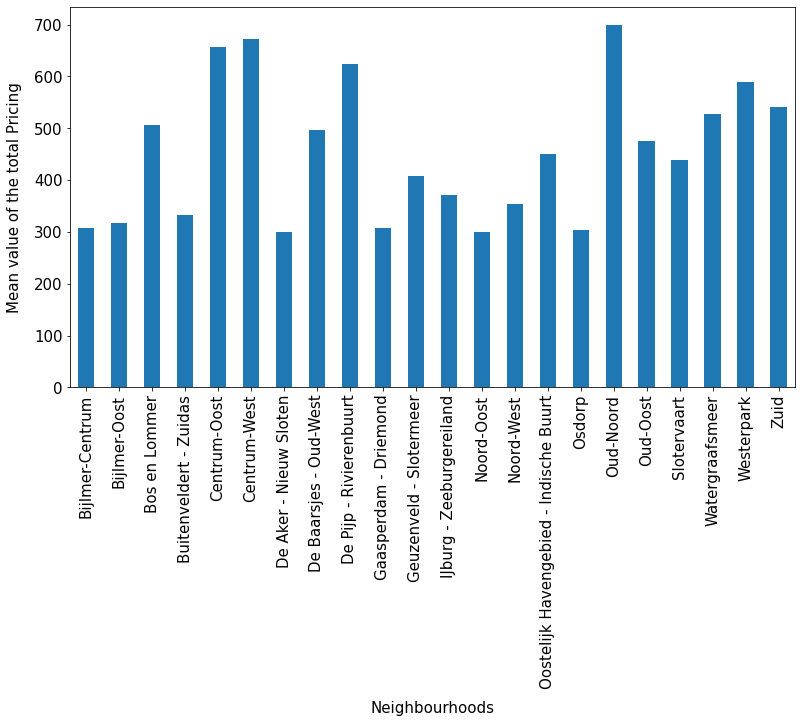

In [34]:
amsterdam.groupby("Neighbourhood").realSum.mean().plot(kind="bar", fontsize=15, figsize=(13,7))
plt.ylabel("Mean value of the total Pricing", labelpad=12, fontsize=15)
plt.xlabel("Neighbourhoods", labelpad=12, fontsize=15)
plt.show();

The most expensive Neighbourhoods are:

- Oud-Noord
- Centrum-Oost
- Centrum-West


Let's visualize the whole result:

In [35]:
value_per_neighbourhood = pd.DataFrame(amsterdam.groupby("Neighbourhood").realSum.mean()).reset_index()
nbh_geo_df = nbh_geo_df.rename(columns={"neighbourhood":"Neighbourhood"})
value_per_neighbourhood = value_per_neighbourhood.merge(nbh_geo_df,on="Neighbourhood")
value_per_neighbourhood = value_per_neighbourhood.drop(["neighbourhood_group"], axis=1)


map = folium.Map(location=capitals_lat_lng[which_city],
                 tiles="cartodbpositron",zoom_start=11.5) 
folium.Marker(location=capitals_lat_lng[which_city],
              icon = folium.Icon(color='black')).add_to(map)


for key,val in touristic_places_Amsterdam.items():
    folium.Marker(location=val).add_to(map)
    
for i in range(len(data_weekdays[data_weekdays.City==which_city]['lat'])):
    latitude = data_weekdays[data_weekdays.City==which_city]['lat'][i]
    longitude = data_weekdays[data_weekdays.City==which_city]['lng'][i]
    folium.CircleMarker(location=[latitude,longitude],radius=6,fill_color="black",
                        opacity=0.8,fill_opacity=0.4,fill=True,color=True).add_to(map)


folium.Choropleth(
    geo_data=nbh_geo_df,
    name="choropleth",
    data=value_per_neighbourhood.realSum,
    columns=["Neighbourhood", "realSum"],
    key_on="feature.id",
    fill_color="RdYlGn",
    fill_opacity=0.6,
    line_opacity=0.6,
    legend_name="Mean of Total Prices",
).add_to(map)

folium.LayerControl().add_to(map)

map

We see the colored neighbourhoods based on the mean value of the total price, the listing options with circles, Amsterdam city center with black pointer and tourism places with blue pointers.

Neighbourhood which includes the city center is the densest among all, and the most expensive. While moving outside the city center, the mean values per neighbourhood decreases, except of one neighbourhood. 